# Bank Customer Churn Prediction

The aim of this project to analyze the bank customer's demographics and financial information which inculdes customer's age, gender. country, credit score, balance and many others to predict whether the customer will leave the bank or not.

### About the dataset
The dataset is taken from [Kaggle](https://www.kaggle.com/datasets/mathchi/churn-for-bank-customers?datasetId=797699&sortBy=voteCount). It contains 10000 rows and 14 columns. The objective of the dataset is to predict whether the customer will leave the bank or not, based on the customer's demographics and financial information included in the dataset.

The dataset has several factors that can influence the customer to leave the bank, which are termed as independent variables. The target variable is the customer's decision to leave the bank, which is termed as dependent variable.

### Data Dictionary
| Column Name | Description |
| --- | --- |
| RowNumber | Row number |
| CustomerId | Unique identification key for different customers |
| Surname | Customer's last name |
| CreditScore | Credit score of the customer |
|Geography | Country of the customer |
|Age | Age of the customer |
|Tenure | Number of years for which the customer has been with the bank |
|Balance | Bank balance of the customer |
|NumOfProducts | Number of bank products the customer is utilising |
|HasCrCard | Binary flag for whether the customer holds a credit card with the bank or not |
|IsActiveMember | Binary flag for whether the customer is an active member with the bank or not |
|EstimatedSalary | Estimated salary of the customer in Dollars |
|Exited | Binary flag 1 if the customer closed account with bank and 0 if the customer is retained |

In [151]:
#importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [152]:
#load dataset
df_ori = pd.read_csv("churn.csv")
df_ori.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [153]:
df = df_ori.copy() # Make a copy of the DataFrame to avoid modifying the original

# 1. Data Analysis

In [154]:
df.shape

(10000, 14)

In [155]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [156]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [157]:
df.duplicated().sum()

0

In [158]:
# check for missing values or NaN
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [159]:
# check for unique value on each column
df.nunique()

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

# 2. Data Preprocessing

##### Dropping the unecessary columns - RowNumber, CustomerId, Surname

In [160]:
df = df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)

##### Renaming the column 'Exited' to 'Churn'

In [161]:
df.rename(columns={'Exited':'Churn'}, inplace=True)

In [162]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Churn
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


# 3. Data Exploration

### 3.1 Distribution of Data

In [163]:
# Filter the DataFrame to include only rows where churn occurred (Churn == 1)
churned_df = df[df['Churn'] == 1]
not_churned_df = df[df['Churn'] == 0]

churned_df.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Churn
count,2037.000000,2037.000000,2037.000000,2037.000000,2037.000000,2037.000000,2037.000000,2037.000000,2037.0
mean,645.351497,44.837997,4.932744,91108.539337,1.475209,0.699067,0.360825,101465.677531,1.0
std,100.321503,9.761562,2.936106,58360.794816,0.801521,0.458776,0.480358,57912.418071,0.0
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,1.0
25%,578.000000,38.000000,2.000000,38340.020000,1.000000,0.000000,0.000000,51907.720000,1.0
50%,646.000000,45.000000,5.000000,109349.290000,1.000000,1.000000,0.000000,102460.840000,1.0
75%,716.000000,51.000000,8.000000,131433.330000,2.000000,1.000000,1.000000,152422.910000,1.0
max,850.000000,84.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199808.100000,1.0


In [164]:
not_churned_df.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Churn
count,7963.000000,7963.000000,7963.000000,7963.000000,7963.000000,7963.000000,7963.000000,7963.000000,7963.0
mean,651.853196,37.408389,5.033279,72745.296779,1.544267,0.707146,0.554565,99738.391772,0.0
std,95.653837,10.125363,2.880658,62848.040701,0.509536,0.455101,0.497045,57405.586966,0.0
min,405.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,90.070000,0.0
25%,585.000000,31.000000,3.000000,0.000000,1.000000,0.000000,0.000000,50783.490000,0.0
50%,653.000000,36.000000,5.000000,92072.680000,2.000000,1.000000,1.000000,99645.040000,0.0
75%,718.000000,41.000000,7.000000,126410.280000,2.000000,1.000000,1.000000,148609.955000,0.0
max,850.000000,92.000000,10.000000,221532.800000,3.000000,1.000000,1.000000,199992.480000,0.0


#### 3.1.1 Churn Distribution

In [165]:
churn_count = df['Churn'].value_counts()
print(churn_count)

Churn
0    7963
1    2037
Name: count, dtype: int64


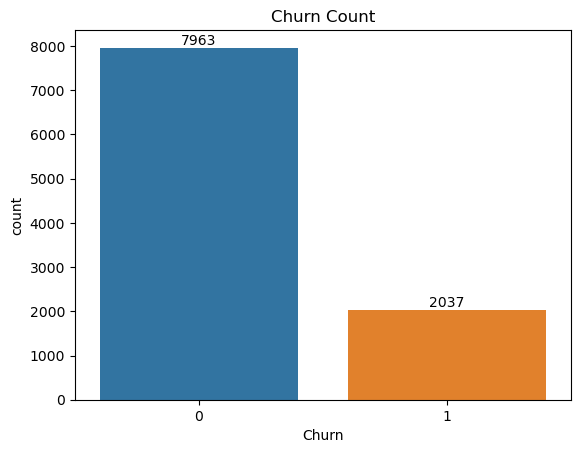

In [166]:
sns.countplot(x='Churn', data= df)

# Annotate count values
for i, count in enumerate(df['Churn'].value_counts()):
    plt.text(i, count, str(count), ha = 'center',va='bottom')

plt.title("Churn Count")
plt.show()

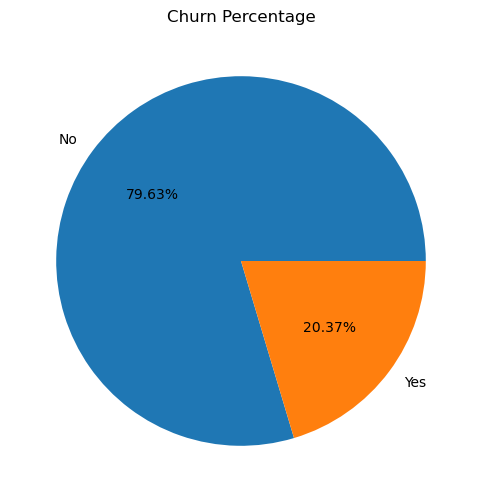

In [167]:
#pie chart
plt.figure(figsize=(10,6))
plt.pie(df['Churn'].value_counts(), labels=['No','Yes'], autopct='%1.2f%%')
plt.title('Churn Percentage')
plt.show()

### Findings:
1. We are handling with imbalance dataset usecase. We have count of churn = 2037 and not_churn = 7963.
2. The pie chart clearly visulaizes the customer churn in % the dataset. The majority of the customers in the dataset continue to use the serivces of the bank with 20.4% of the customers churning.
3. Need to find which features contribute to the high % of customer churn

#### 3.1.2 Gender Distribution

In [168]:
gender_count = df['Gender'].value_counts()
print(gender_count)

Gender
Male      5457
Female    4543
Name: count, dtype: int64


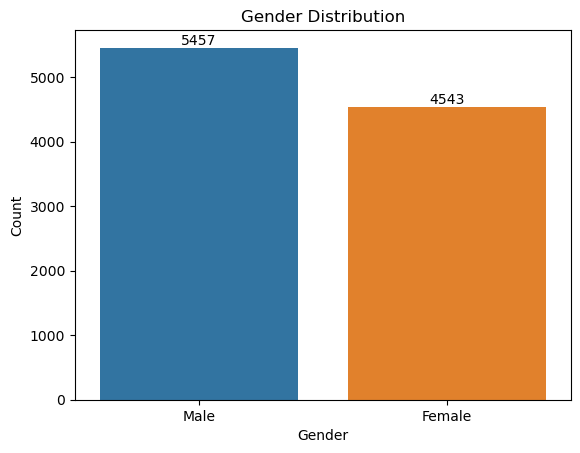

In [169]:
# Plot Gender distribution
# Define the order of categories
order = ['Male', 'Female']
sns.countplot(x='Gender', data=df, order=order)

# Annotate count values for Gender distribution
for i, count in enumerate(df['Gender'].value_counts()):
    plt.text(i, count, str(count), ha='center', va='bottom')

plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()


<Axes: xlabel='Gender', ylabel='count'>

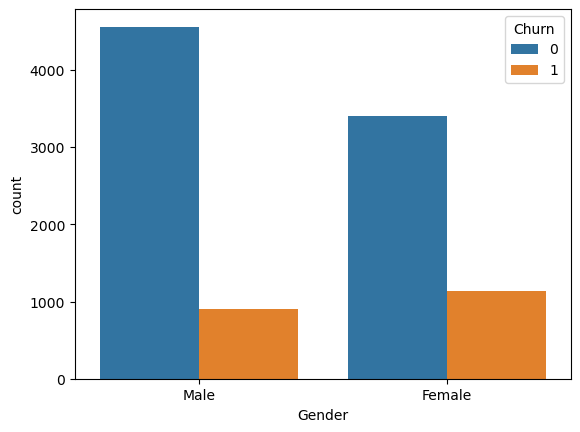

In [170]:
# Plot Gender distribution with respect to churn
sns.countplot(x='Gender', data=df, hue='Churn', order=order)

In [171]:
gender_count_by_churn = df.groupby(['Gender', 'Churn']).size().unstack(fill_value=0)
gender_count_by_churn

# Calculate the total count of customers for each gender
gender_total_count = gender_count_by_churn.sum(axis=1)
# print(gender_total_count)

# Calculate the percentage of churn by gender
churn_percentage_by_gender = (gender_count_by_churn[1] / gender_total_count) * 100
# print(churn_percentage_by_gender)

# Reset the index to use 'Gender' and 'Churn' as columns
churn_percentage_by_gender = churn_percentage_by_gender.reset_index()
# print(churn_percentage_by_gender)

# Rename columns
churn_percentage_by_gender.columns = ['Gender', 'Churn Percentage']
print(churn_percentage_by_gender)


   Gender  Churn Percentage
0  Female         25.071539
1    Male         16.455928


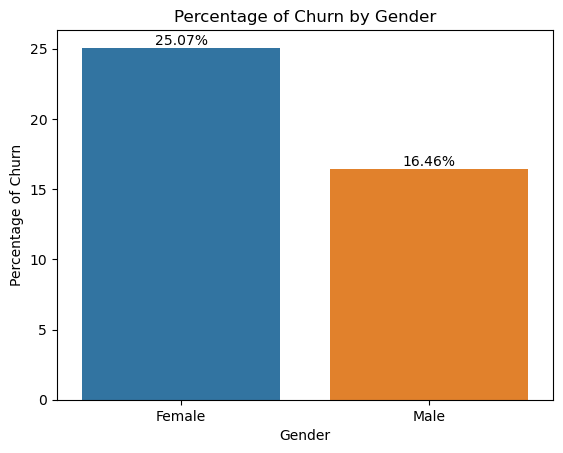

In [172]:
# Bar plot
sns.barplot(x='Gender', y='Churn Percentage', data=churn_percentage_by_gender)

# Annotate count values for Gender distribution
for i, count in enumerate(churn_percentage_by_gender['Churn Percentage']):
    plt.text(i, count, f"{count:.2f}%", ha='center', va='bottom')

plt.title('Percentage of Churn by Gender')
plt.xlabel('Gender')
plt.ylabel('Percentage of Churn')

plt.show()

### Findings:

1. As shown in the graph, majority of the customers are male. However, upon looking at the customer churn %, we can see that females have more tendency (25.07%) to churn as compared to males (16.46%). 

2. Gender might be consider as one of the factor for customer churn 

#### 3.1.3 Age Distribution

In [173]:
count_distribution_by_age = df['Age'].value_counts()
count_distribution_by_age

Age
37    478
38    477
35    474
36    456
34    447
     ... 
92      2
82      1
88      1
85      1
83      1
Name: count, Length: 70, dtype: int64

In [174]:
df['Age'].describe()

count    10000.000000
mean        38.921800
std         10.487806
min         18.000000
25%         32.000000
50%         37.000000
75%         44.000000
max         92.000000
Name: Age, dtype: float64

In [175]:
churned_df['Age'].describe()

count    2037.000000
mean       44.837997
std         9.761562
min        18.000000
25%        38.000000
50%        45.000000
75%        51.000000
max        84.000000
Name: Age, dtype: float64

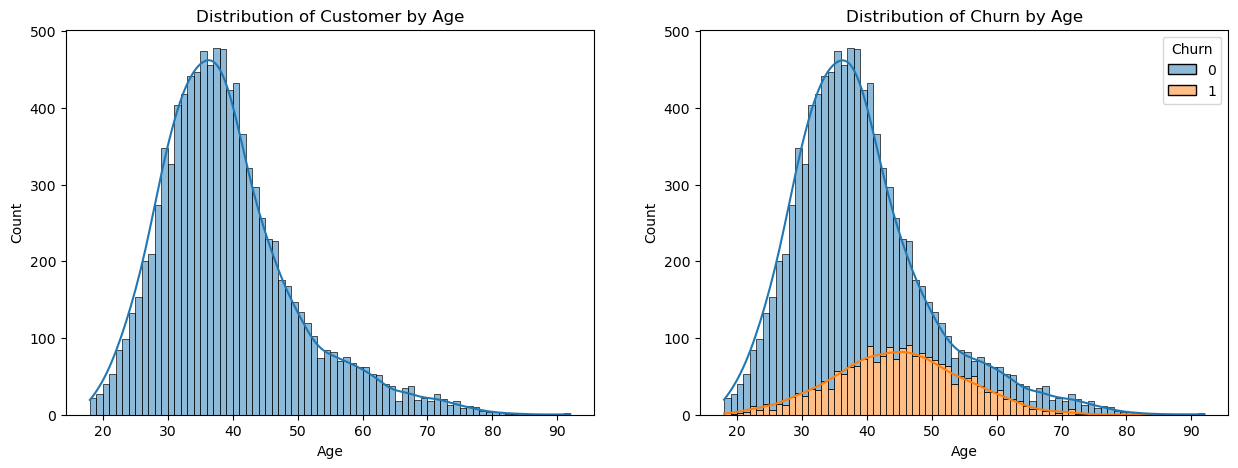

In [176]:
# histogram for age distribution
fig,ax = plt.subplots(1,2,figsize=(15,5))

# Plot with Bin to have a better visualization of the data. Without bin, there might be misunderstanding of the data.
sns.histplot(x = 'Age', data=df, bins=74, multiple='stack', kde=True, ax=ax[0])
ax[0].set_title('Distribution of Customer by Age')

sns.histplot(x = 'Age', data = df, bins=74, hue='Churn', multiple='stack', kde=True, ax=ax[1])
ax[1].set_title('Distribution of Churn by Age')
plt.show()

#NOTE: Blue "0" is actually the total count of age and not represent "not Churn"

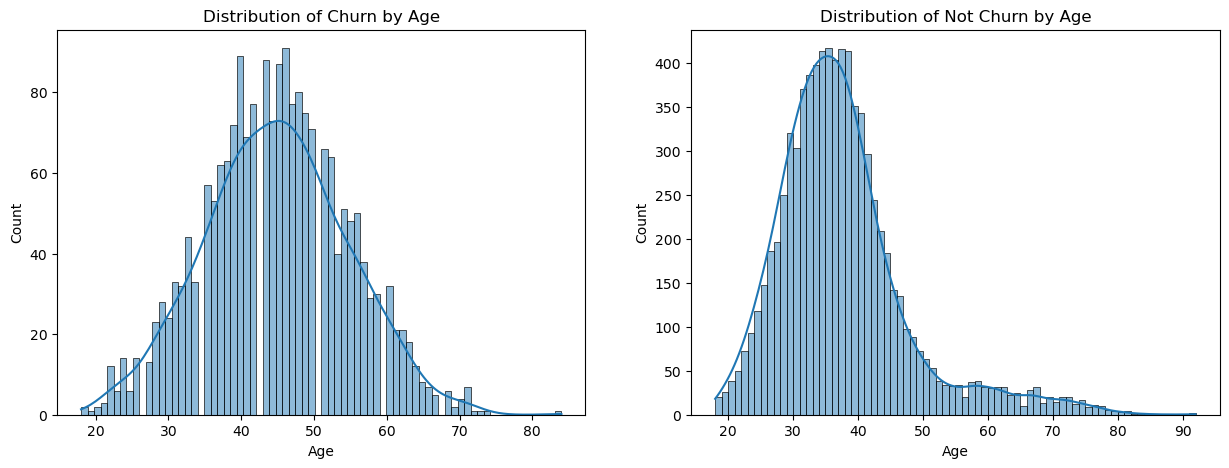

In [177]:
# histogram for age distribution
fig,ax = plt.subplots(1,2,figsize=(15,5))

# Plot with Bin to have a better visualization of the data. Without bin, there might be misunderstanding of the data.
sns.histplot(x = 'Age', data=churned_df, bins=74, multiple='stack', kde=True, ax=ax[0])
ax[0].set_title('Distribution of Churn by Age')

sns.histplot(x = 'Age', data =not_churned_df,bins=74, multiple='stack', kde=True, ax=ax[1])
ax[1].set_title('Distribution of Not Churn by Age')

plt.show()

### Findings:
1. The majority of the customers are from age group 30-45 years old. 
2. However the customer churn count is highest for the customers of age 35 and 55.
3. Average mean age for customer who churn is 44.83 years old (45years old).
3. The lowest churn count are from age group 20-25 years and 70+ years old.
4. Age plays a significant role in customer churn, where late adults are more likely to churn as compared to young adults with minimal churn count.

#### 3.1.4 Credit Score Distribution

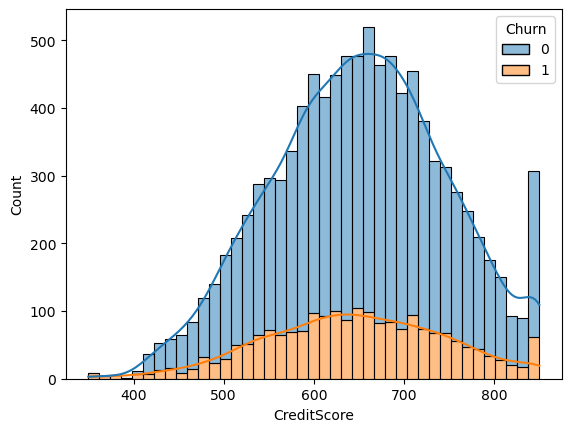

In [178]:
# Data Distribution
sns.histplot(x="CreditScore", data=df, hue="Churn", multiple="stack", kde=True)
plt.show()

1. Interestingly, there are high count of customer with Creditscore above 840+, but the number of churn also high. But we need to review on how much % of churn by each CreditScore.

In [179]:
creditscore_count_by_churn = df.groupby(['CreditScore', 'Churn']).size().unstack(fill_value=0)

# Calculate the total count of customers for each gender
creditscore_total_count = creditscore_count_by_churn.sum(axis=1)

# Calculate the percentage of churn by gender
churn_percentage_by_creditscore = (creditscore_count_by_churn[1] / creditscore_total_count) * 100

# Reset the index to use 'Gender' and 'Churn' as columns
churn_percentage_by_creditscore = churn_percentage_by_creditscore.reset_index()

# Rename columns
churn_percentage_by_creditscore.columns = ['CreditScore', 'Churn Percentage']
print(churn_percentage_by_creditscore)

     CreditScore  Churn Percentage
0            350        100.000000
1            351        100.000000
2            358        100.000000
3            359        100.000000
4            363        100.000000
..           ...               ...
455          846         40.000000
456          847         33.333333
457          848          0.000000
458          849         25.000000
459          850         18.454936

[460 rows x 2 columns]


In [180]:
high_churn_df = churn_percentage_by_creditscore[churn_percentage_by_creditscore['Churn Percentage'] > 90]
high_churn_df

,CreditScore,Churn Percentage
0,350,100.0
1,351,100.0
2,358,100.0
3,359,100.0
4,363,100.0
5,365,100.0
6,367,100.0
7,373,100.0
8,376,100.0
9,382,100.0


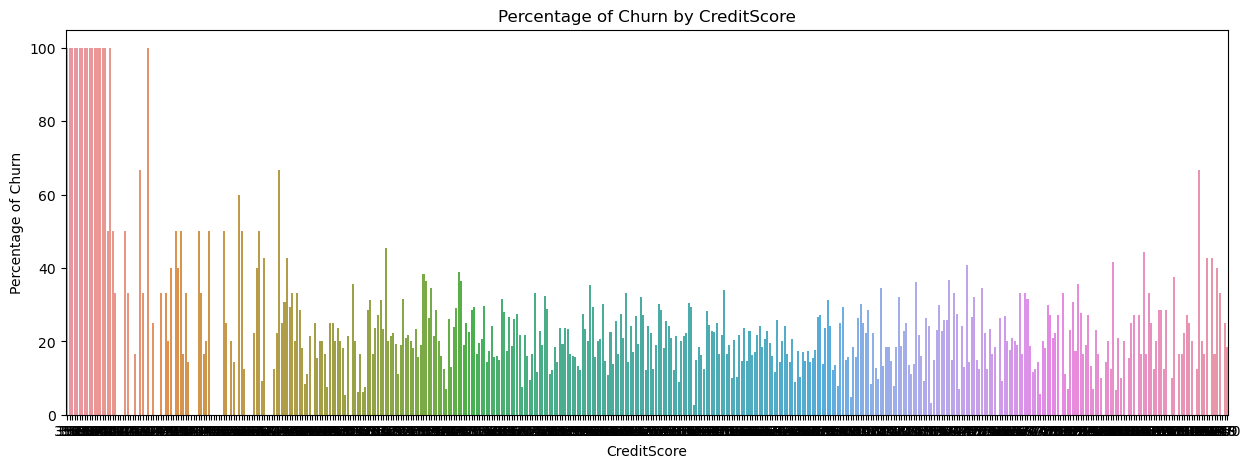

In [181]:
# Bar plot
plt.figure(figsize=(15, 5))
sns.barplot(x='CreditScore', y='Churn Percentage', data=churn_percentage_by_creditscore)
# sns.lineplot(x='CreditScore', y='Churn Percentage', data=churn_percentage_by_creditscore)

plt.title('Percentage of Churn by CreditScore')
plt.xlabel('CreditScore')
plt.ylabel('Percentage of Churn')
plt.show()

We can clearly see that, customer with lower creditscore (<420), has high percentage of churn

## Check for Outliers

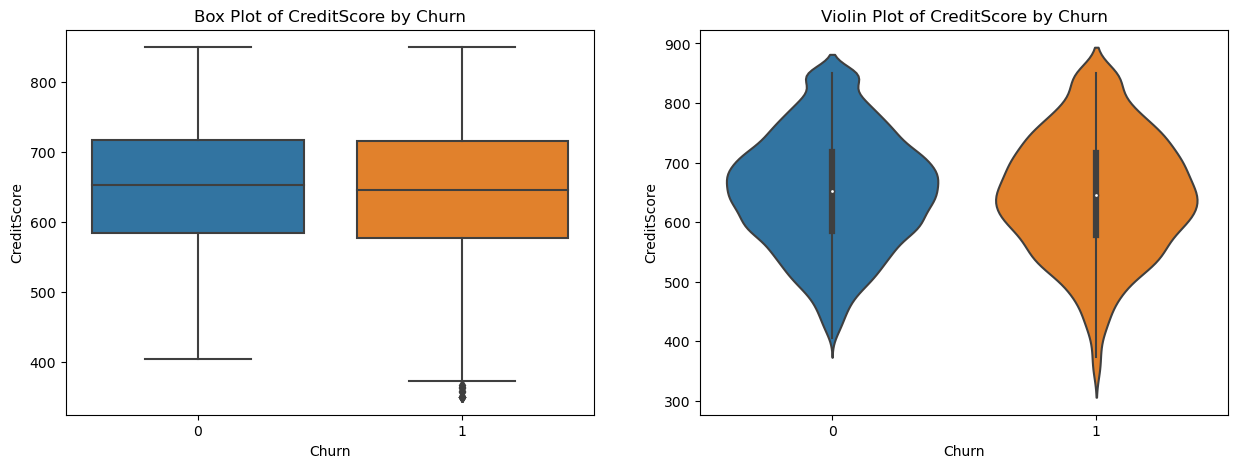

In [182]:
# Check for outliers
fig,ax = plt.subplots(1,2,figsize=(15,5))
sns.boxplot(x ='Churn' , y = 'CreditScore', data=df ,ax=ax[0])
ax[0].set_title('Box Plot of CreditScore by Churn')

sns.violinplot(x ='Churn' , y = 'CreditScore', data=df ,ax=ax[1])
ax[1].set_title('Violin Plot of CreditScore by Churn')
plt.show()

### Findings
1. Mean Creditscore for churn customer is 645.351497 and not churn customer is 651.853196.
2. In the boxplot, the mean of both the churn and non churn customers are almost same.
3. There are outliers for churn customer with creditscore below 400. We need to count how many outliers and handle them.
4. Now we can clearly see that, customer with lower creditscore (<420), has high percentage of churn. However this is outliers. If we remove the outliers, creditscore is not a  good indicator for customer churn.


#### 3.1.5 Customer Location Distribution

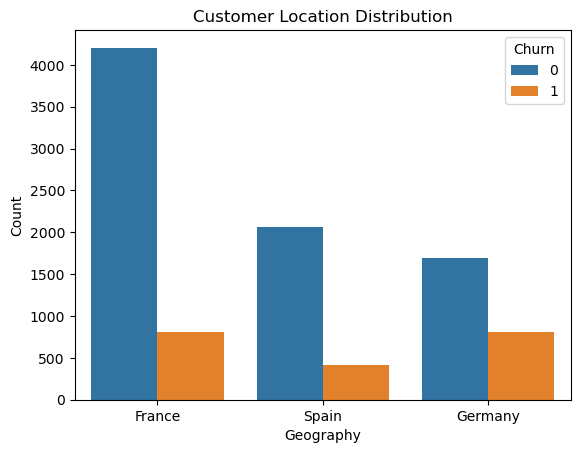

In [183]:
sns.countplot(x='Geography', data= df, hue='Churn')
plt.title('Customer Location Distribution')
plt.xlabel('Geography')
plt.ylabel('Count')
plt.show()

In [184]:
country_count_by_churn = df.groupby(['Geography', 'Churn']).size().unstack(fill_value=0)

# Calculate the total count of customers for each Country
country_total_count = country_count_by_churn.sum(axis=1)

# # Calculate the percentage of churn by Country
churn_percentage_by_country = (country_count_by_churn[1] / country_total_count) * 100

# # Reset the index to use 'Gender' and 'Churn' as columns
churn_percentage_by_country = churn_percentage_by_country.reset_index()

# # Rename columns
churn_percentage_by_country.columns = ['Geography', 'Churn Percentage']
print(churn_percentage_by_country)

  Geography  Churn Percentage
0    France         16.154767
1   Germany         32.443204
2     Spain         16.673395


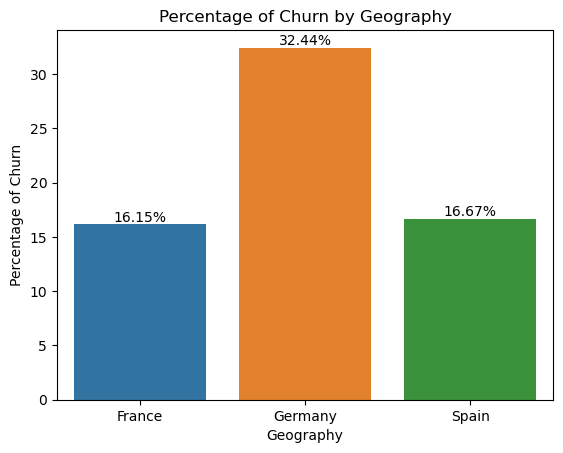

In [185]:
# Bar plot
sns.barplot(x='Geography', y='Churn Percentage', data=churn_percentage_by_country)

# Annotate count values for Gender distribution
for i, count in enumerate(churn_percentage_by_country['Churn Percentage']):
    plt.text(i, count, f"{count:.2f}%", ha='center', va='bottom')

plt.title('Percentage of Churn by Geography')
plt.xlabel('Geography')
plt.ylabel('Percentage of Churn')

plt.show()

### Findings 

1. Majority of the customers are from France, followed by Spain and Germany. 
2. However in contrast to that Germany has the highest percentage of customer curn followed by Spain and France. From this we can infer that German customers are more likely to churn than the customers from other countries.

#### 3.1.6 Tenure Distribution

In [186]:
count_distribution_by_tenure = df['Tenure'].value_counts()
count_distribution_by_tenure

Tenure
2     1048
1     1035
7     1028
8     1025
5     1012
3     1009
4      989
9      984
6      967
10     490
0      413
Name: count, dtype: int64

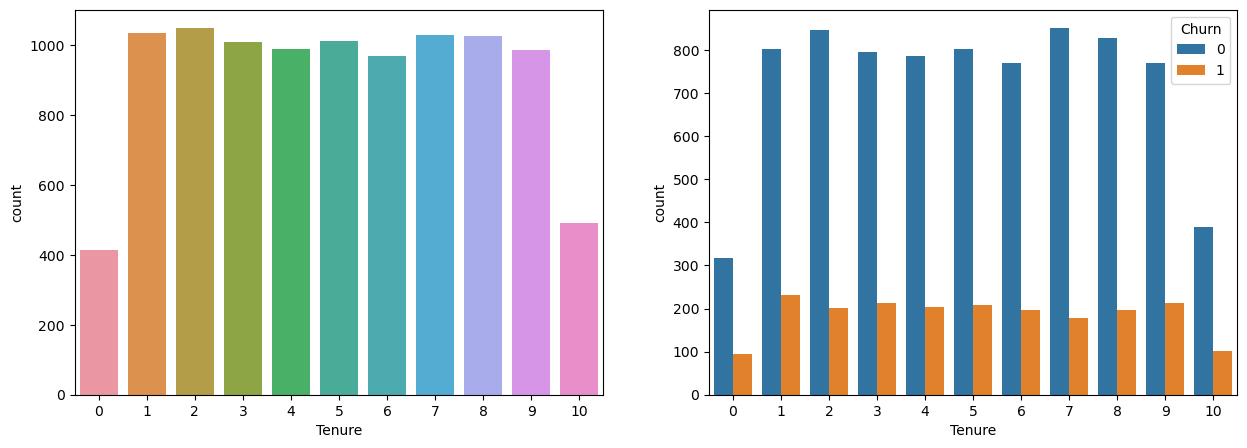

In [187]:
fig,ax = plt.subplots(1,2,figsize=(15,5))
sns.countplot(x='Tenure', data=df, ax=ax[0])
sns.countplot(x='Tenure', data= df, hue='Churn', ax=ax[1])
plt.show()

In [188]:
tenure_count_by_churn = df.groupby(['Tenure', 'Churn']).size().unstack(fill_value=0)

# Calculate the total count of customers for each Country
tenure_total_count = tenure_count_by_churn.sum(axis=1)

# # # Calculate the percentage of churn by Country
churn_percentage_by_tenure = (tenure_count_by_churn[1] / tenure_total_count) * 100

# # # Reset the index to use 'Gender' and 'Churn' as columns
churn_percentage_by_tenure = churn_percentage_by_tenure.reset_index()

# # # Rename columns
churn_percentage_by_tenure.columns = ['Tenure', 'Churn Percentage']
print(churn_percentage_by_tenure)

    Tenure  Churn Percentage
0        0         23.002421
1        1         22.415459
2        2         19.179389
3        3         21.110010
4        4         20.525784
5        5         20.652174
6        6         20.268873
7        7         17.217899
8        8         19.219512
9        9         21.646341
10      10         20.612245


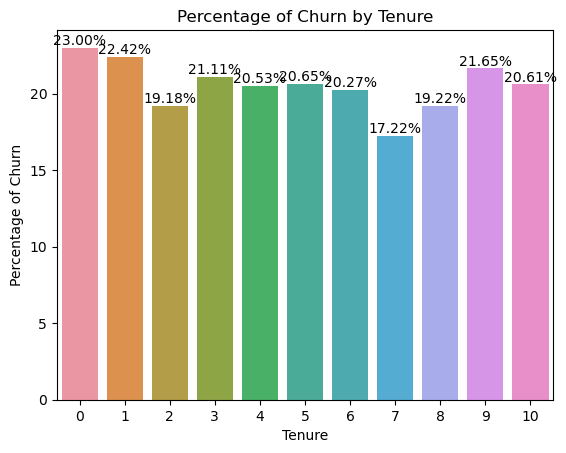

In [189]:
# Bar plot
sns.barplot(x='Tenure', y='Churn Percentage', data=churn_percentage_by_tenure)

# Annotate count values for Gender distribution
for i, count in enumerate(churn_percentage_by_tenure['Churn Percentage']):
    plt.text(i, count, f"{count:.2f}%", ha='center', va='bottom')

plt.title('Percentage of Churn by Tenure')
plt.xlabel('Tenure')
plt.ylabel('Percentage of Churn')

plt.show()

In [190]:
churn_percentage_by_tenure.describe()

,Tenure,Churn Percentage
count,11.000000,11.000000
mean,5.000000,20.531828
std,3.316625,1.607851
min,0.000000,17.217899
25%,2.500000,19.744192
50%,5.000000,20.612245
75%,7.500000,21.378176
max,10.000000,23.002421


### Findings
Tensure refers to the time (in years) that a customer has been a client of the bank. 
1. Majority of the customers in the dataset have a tenure between 1-9 years, having equal distribution among them. 
2. Average customers has tenure for 5 years.
3. There are very few customers with a tenure of less than 1 years or more than 9 years. 
4. Looking at the churn of these customers based on their tenure, it can be observed that customers with tenure 1-9 years have higher churn COUNT. Less churn COUNT for customer 0 years and 10years.
5. However, by calculating the percentage of churn by tenure, it shows that the % of churn for each tenure years is with average 20.5% in regards of tenure years. 
6. Therefore we can can conclude that tenure does not play the main cause for customer churn.


#### 3.1.7 Bank Balance Distribution

In [191]:
df['Balance'].describe()

count     10000.000000
mean      76485.889288
std       62397.405202
min           0.000000
25%           0.000000
50%       97198.540000
75%      127644.240000
max      250898.090000
Name: Balance, dtype: float64

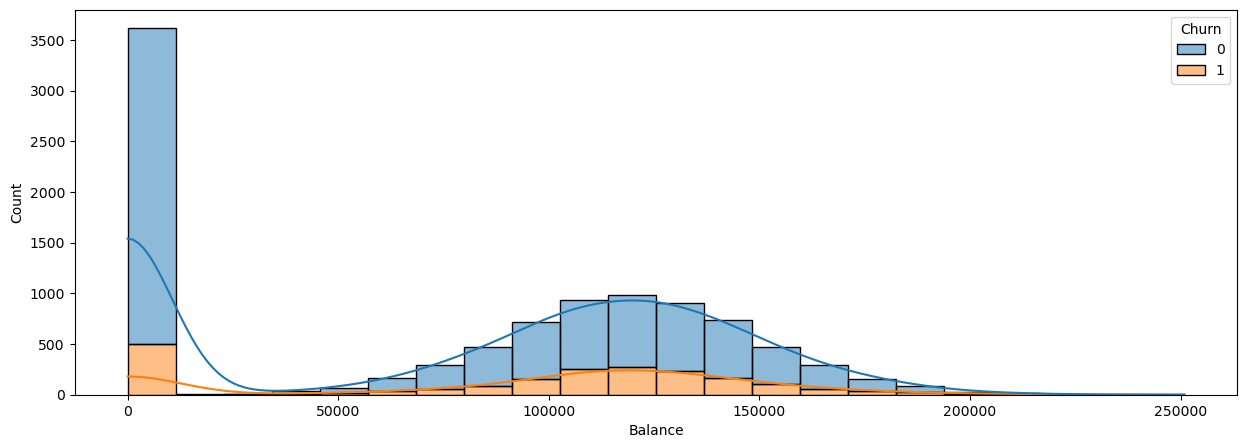

In [192]:
plt.figure(figsize=(15, 5))
sns.histplot(x = 'Balance', data = df, hue='Churn', multiple='stack', kde=True)
plt.show()

In [193]:
# Create a binary column indicating whether the balance is 0 or more than 0
df['ZeroBalance'] = (df['Balance'] == 0).astype(int)

# Calculate the percentage of users with Balance = 0
percent_zero_balance = (df['ZeroBalance'].sum() / len(df)) * 100

# Calculate the percentage of users with Balance more than 0
percent_non_zero_balance = 100 - percent_zero_balance

print("Percentage of users with Balance = 0:", percent_zero_balance)
print("Percentage of users with Balance > 0:", percent_non_zero_balance)

Percentage of users with Balance = 0: 36.17
Percentage of users with Balance > 0: 63.83


### Findings

1. A huge number of customers have zero bank balance (36.17%) which also resulted in them leaving the bank. 
2. Customer having bank balance between 100000 to 150000 are more likely (higher %) to leave the bank compare to the customers with zero bank balance.
3. Bank balance might play a big role for customer to leave the bank

#### 3.1.8 NumOfProducts Distribution

In [194]:
df['NumOfProducts'].describe()

count    10000.000000
mean         1.530200
std          0.581654
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max          4.000000
Name: NumOfProducts, dtype: float64

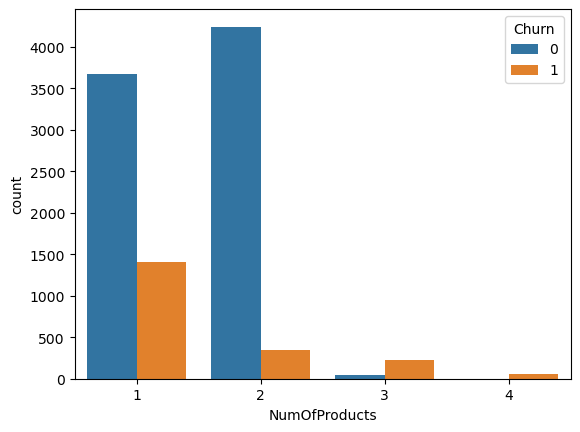

In [195]:
sns.countplot(x='NumOfProducts', data=df, hue='Churn')
plt.show()

In [196]:
product_count_by_churn = df.groupby(['NumOfProducts', 'Churn']).size().unstack(fill_value=0)

# Calculate the total count of customers for each Country
product_total_count = product_count_by_churn.sum(axis=1)

# # # Calculate the percentage of churn by Country
churn_percentage_by_product = (product_count_by_churn[1] / product_total_count) * 100

# # # Reset the index to use 'Gender' and 'Churn' as columns
churn_percentage_by_product = churn_percentage_by_product.reset_index()

# # # Rename columns
churn_percentage_by_product.columns = ['NumOfProducts', 'Churn Percentage']
print(churn_percentage_by_product)

   NumOfProducts  Churn Percentage
0              1         27.714398
1              2          7.581699
2              3         82.706767
3              4        100.000000


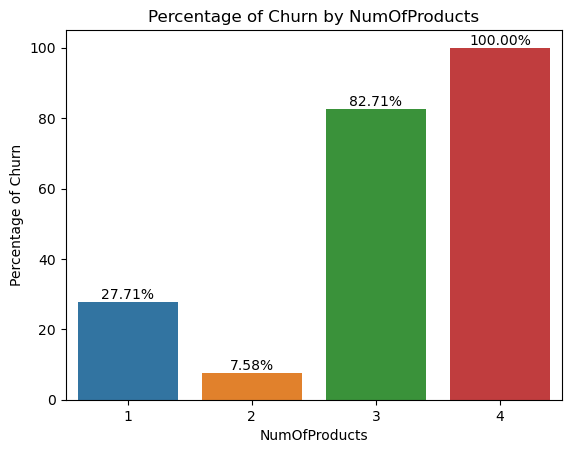

In [197]:
# Bar plot
sns.barplot(x='NumOfProducts', y='Churn Percentage', data=churn_percentage_by_product)

# Annotate count values for Gender distribution
for i, count in enumerate(churn_percentage_by_product['Churn Percentage']):
    plt.text(i, count, f"{count:.2f}%", ha='center', va='bottom')

plt.title('Percentage of Churn by NumOfProducts')
plt.xlabel('NumOfProducts')
plt.ylabel('Percentage of Churn')

plt.show()

### Findings:

In the dataset, we have customers in four categories according to the number of products purchased. 
1. Majority of the customers  has 1 and 2 number of products with high number count of customer churn. However, the % churn is lower compare to customer with 3 and 4 products. 
2. In the category where customers have purchased 3 or 4 products the count number of leaving customers is much higher than the non leaving customers. They have higher % to leave the bank.
3. We can not conclude that higher number of products leave to customer churn since the total data for customer with high products is less.|

#### 3.1.9 HasCrCard Distribution

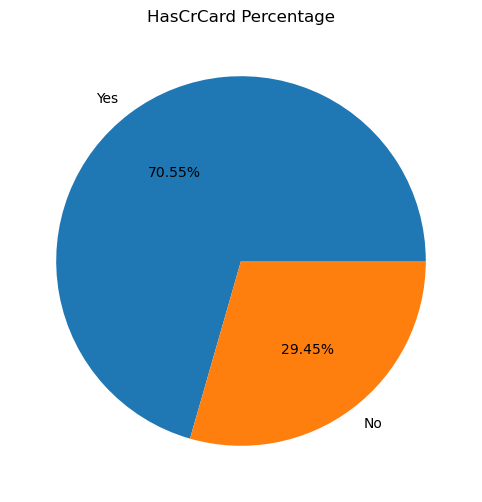

In [198]:
plt.figure(figsize=(10,6))
plt.pie(df['HasCrCard'].value_counts(), labels=['Yes','No'], autopct='%1.2f%%')
plt.title('HasCrCard Percentage')
plt.show()

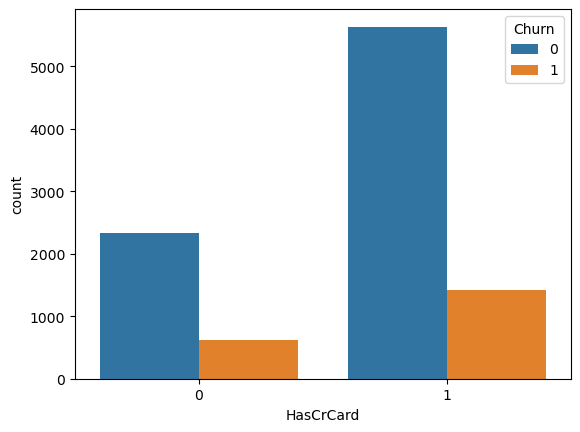

In [199]:
sns.countplot(x='HasCrCard', data=df, hue='Churn')
plt.show()

In [200]:
hascrcard_count_by_churn = df.groupby(['HasCrCard', 'Churn']).size().unstack(fill_value=0)

# Calculate the total count of customers for each Country
hascrcard_total_count = hascrcard_count_by_churn.sum(axis=1)

# # # Calculate the percentage of churn by Country
churn_percentage_by_hascrcard = (hascrcard_count_by_churn[1] / hascrcard_total_count) * 100

# # # Reset the index to use 'Gender' and 'Churn' as columns
churn_percentage_by_hascrcard = churn_percentage_by_hascrcard.reset_index()

# # # Rename columns
churn_percentage_by_hascrcard.columns = ['HasCrCard', 'Churn Percentage']
print(churn_percentage_by_hascrcard)

   HasCrCard  Churn Percentage
0          0         20.814941
1          1         20.184266


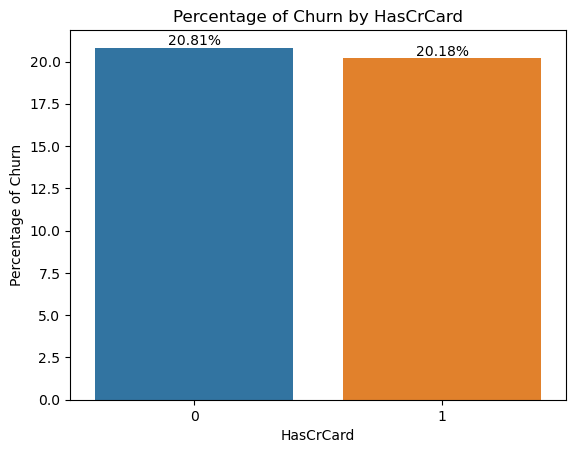

In [201]:
# Bar plot
sns.barplot(x='HasCrCard', y='Churn Percentage', data=churn_percentage_by_hascrcard)

# Annotate count values for Gender distribution
for i, count in enumerate(churn_percentage_by_hascrcard['Churn Percentage']):
    plt.text(i, count, f"{count:.2f}%", ha='center', va='bottom')

plt.title('Percentage of Churn by HasCrCard')
plt.xlabel('HasCrCard')
plt.ylabel('Percentage of Churn')

plt.show()

### Findings:
1. Majority of the customers have credit cars with 70.55 % of the customers have credit cards leaving 30% of the customers who do not have credit cards. 
2. Higher number of customer leaving the bank for customer who has credit cards compare to not having one.
3. However, the % of churn for customer who has credit card and who does not is almost similar ~ 20%.
4. HasCrCard might not be a good indicator to identify customer churn.

#### 3.1.10 IsActiveMember Distribution

In [202]:
df['IsActiveMember'].value_counts()

IsActiveMember
1    5151
0    4849
Name: count, dtype: int64

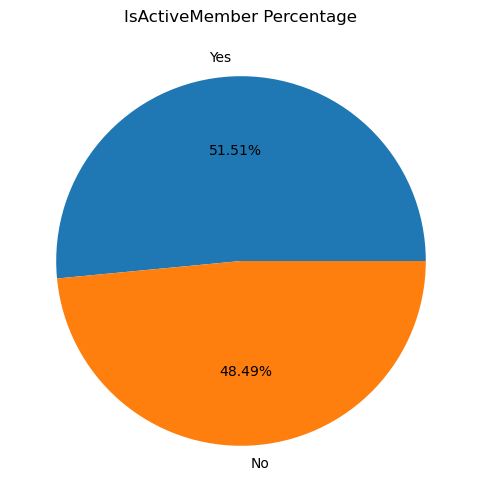

In [203]:
plt.figure(figsize=(10,6))
plt.pie(df['IsActiveMember'].value_counts(), labels=['Yes','No'], autopct='%1.2f%%')
plt.title('IsActiveMember Percentage')
plt.show()

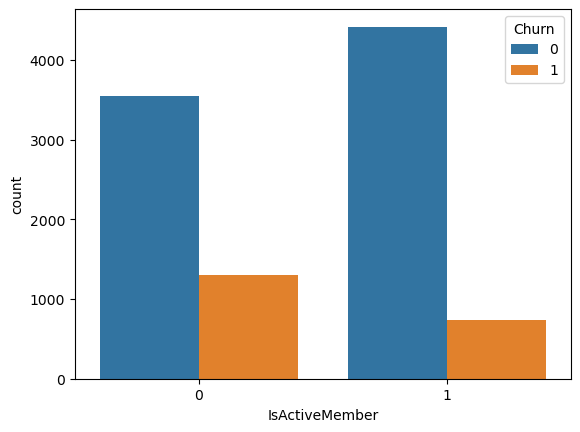

In [204]:
sns.countplot(x='IsActiveMember', hue='Churn', data=df)
plt.show()

In [205]:
activemember_count_by_churn = df.groupby(['IsActiveMember', 'Churn']).size().unstack(fill_value=0)

# Calculate the total count of customers for each Country
activemember_total_count = activemember_count_by_churn.sum(axis=1)

# # # Calculate the percentage of churn by Country
churn_percentage_by_activemember = (activemember_count_by_churn[1] / activemember_total_count) * 100

# # # Reset the index to use 'Gender' and 'Churn' as columns
churn_percentage_by_activemember = churn_percentage_by_activemember.reset_index()

# # # Rename columns
churn_percentage_by_activemember.columns = ['IsActiveMember', 'Churn Percentage']
print(churn_percentage_by_activemember)

   IsActiveMember  Churn Percentage
0               0         26.850897
1               1         14.269074


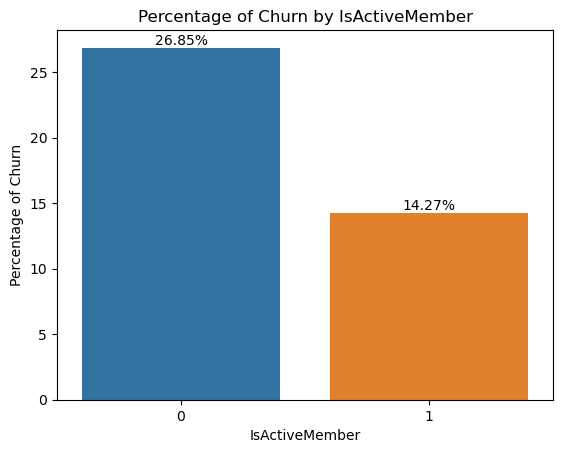

In [206]:
# Bar plot
sns.barplot(x='IsActiveMember', y='Churn Percentage', data=churn_percentage_by_activemember)

# Annotate count values for Gender distribution
for i, count in enumerate(churn_percentage_by_activemember['Churn Percentage']):
    plt.text(i, count, f"{count:.2f}%", ha='center', va='bottom')

plt.title('Percentage of Churn by IsActiveMember')
plt.xlabel('IsActiveMember')
plt.ylabel('Percentage of Churn')
plt.show()

### Findings:

1. The churn count is higher for non active members as compared to the active members of the bank.
2. Non active member has higher % to leave the bank at 26.85% compare to active members at 14.27%. 
3. IsActiveMember might be a good indicator for customer churn

Therefore, the bank should focus on the non active members and try to improve their services to retain them.

#### 3.1.11 EstimatedSalary Distribution

In [207]:
df['EstimatedSalary'].describe()

count     10000.000000
mean     100090.239881
std       57510.492818
min          11.580000
25%       51002.110000
50%      100193.915000
75%      149388.247500
max      199992.480000
Name: EstimatedSalary, dtype: float64

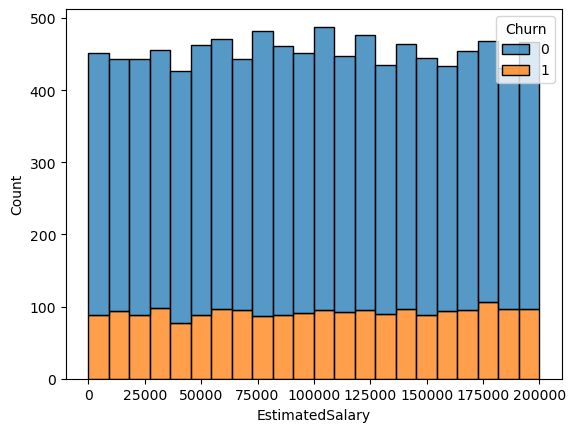

In [208]:
sns.histplot(x = 'EstimatedSalary', data = df, hue='Churn', multiple='stack')
plt.show()

### Findings

This graph shows the distribution of the estimated salary of the customers along with the churn count. On the whole the there is no definite pattern in the salary distribution of the customers who churned and who didn't. Therefore estimated salary is not a good predictor of churn.

# 4. Data Pre-Processing-2

In [209]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Churn,ZeroBalance
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,0
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,1
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0


#### 4.1 Remove Outliers
Removing outlier from claims values column using IQR method. Can also use z-score method

### 4.1.1 IQR Method

In [210]:
df.shape

(10000, 12)

In [211]:
Q1 = df['CreditScore'].quantile(0.25)
Q3 = df['CreditScore'].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter the DataFrame to remove outliers
df = df[(df['CreditScore'] >= lower_bound) & (df['CreditScore'] <= upper_bound)]

In [212]:
df.shape

(9985, 12)

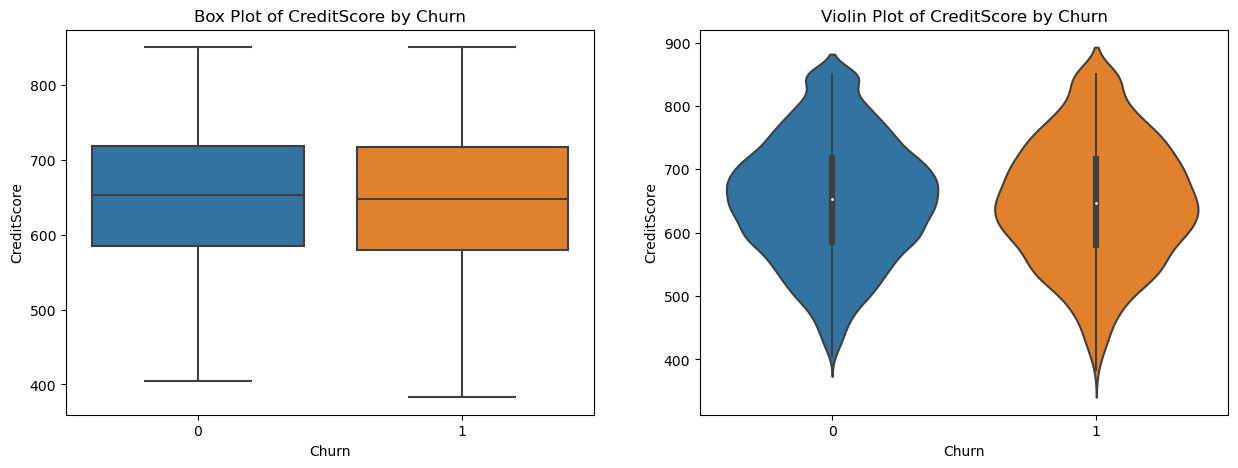

In [213]:
# Check for outliers
fig,ax = plt.subplots(1,2,figsize=(15,5))
sns.boxplot(x ='Churn' , y = 'CreditScore', data=df ,ax=ax[0])
ax[0].set_title('Box Plot of CreditScore by Churn')

sns.violinplot(x ='Churn' , y = 'CreditScore', data=df ,ax=ax[1])
ax[1].set_title('Violin Plot of CreditScore by Churn')
plt.show()

#### 4.1 One-Hot Encoding
For Geography and Gender (Categorical -> Ordinal Type)

In [214]:
from sklearn.preprocessing import OneHotEncoder
one_hot_encoder = OneHotEncoder()

In [215]:
def one_hot_encode(df, columns):
    """
    Performs one-hot encoding for multiple columns in a DataFrame.

    Parameters:
    - df: pandas DataFrame
        Input DataFrame containing the columns to be one-hot encoded.
    - columns: list of strings
        List of column names to be one-hot encoded.

    Returns:
    - df: pandas DataFrame
        DataFrame with specified columns one-hot encoded.
    """
    df = df.copy() # Make a copy of the DataFrame to avoid modifying the original
    for column in columns:
        dummies = pd.get_dummies(df[column], prefix=column)
        df = pd.concat([df, dummies], axis=1)
        df.drop(column, axis=1, inplace=True)
    return df

# Specify columns to be one-hot encoded
columns_to_encode = ['Gender', 'Geography']

# Perform one-hot encoding
df = one_hot_encode(df, columns_to_encode).astype(int)
df.head()


,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Churn,ZeroBalance,Gender_Female,Gender_Male,Geography_France,Geography_Germany,Geography_Spain
0,619,42,2,0,1,1,1,101348,1,1,1,0,1,0,0
1,608,41,1,83807,1,0,1,112542,0,0,1,0,0,0,1
2,502,42,8,159660,3,1,0,113931,1,0,1,0,1,0,0
3,699,39,1,0,2,0,0,93826,0,1,1,0,1,0,0
4,850,43,2,125510,1,1,1,79084,0,0,1,0,0,0,1


#### 4.1 Label Encoding

In [216]:
# # label encoding for categorical -> Ordinal type (shoe size, severity)
# from sklearn.preprocessing import LabelEncoder
# encoder = LabelEncoder()

In [217]:
# def label_encode(df, columns):
#     """
#     Performs label encoding for multiple columns in a DataFrame.

#     Parameters:
#     - df: pandas DataFrame
#         Input DataFrame containing the columns to be label encoded.
#     - columns: list of strings
#         List of column names to be label encoded.

#     Returns:
#     - df: pandas DataFrame
#         DataFrame with specified columns label encoded.
#     """
#     df = df.copy()  # Make a copy of the DataFrame to avoid modifying the original
    
#     for column in columns:
#         df[column] = encoder.fit_transform(df[column])
#     return df

# # Specify columns to be label encoded
# columns_to_encode = ['Gender', 'Geography']

# # Perform label encoding
# df = label_encode(df, columns_to_encode)
# df.head()  

## Normalize vs Standardize:
- Using both when we want to use gradient model based calculation.(linear/logistic regression , Neural Network)!!
- Not required for tree base calculation such as Decision Tree, Random Forest, K-Mean Clustering, SVM, KNN, XG Boost!!

#### Normalization
- Normalize data to a specific range, typically [0, 1].
- Useful when the features have different scales and you want them all to be within a consistent range.

In [218]:
# from sklearn.preprocessing import MinMaxScaler

# def normalization_continuous_variables(df, columns):
#     """
#     Normalizes continuous variables in a DataFrame using StandardScaler.

#     Parameters:
#     - df: pandas DataFrame
#         Input DataFrame containing the columns to be normalized.
#     - columns: list of strings
#         List of column names to be normalized.

#     Returns:
#     - df: pandas DataFrame
#         DataFrame with specified columns normalized.
#     """
#     df = df.copy()  # Make a copy of the DataFrame to avoid modifying the original
#     minmax_scaler = MinMaxScaler()
#     df[columns] = minmax_scaler.fit_transform(df[columns])
#     return df

# # Specify columns to be normalized
# columns_to_normalize = ['CreditScore', 'Balance', 'EstimatedSalary']

# # Normalize continuous variables
# df = normalization_continuous_variables(df, columns_to_normalize)
# df.head()

#### Standardization
- Standardize data to have a mean (*μ*) of 0 and a standard deviation (*σ*) of 1.
- Suitable when features have different means and standard deviations.

In [219]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Churn,ZeroBalance,Gender_Female,Gender_Male,Geography_France,Geography_Germany,Geography_Spain
0,619,42,2,0,1,1,1,101348,1,1,1,0,1,0,0
1,608,41,1,83807,1,0,1,112542,0,0,1,0,0,0,1
2,502,42,8,159660,3,1,0,113931,1,0,1,0,1,0,0
3,699,39,1,0,2,0,0,93826,0,1,1,0,1,0,0
4,850,43,2,125510,1,1,1,79084,0,0,1,0,0,0,1


In [220]:
# # Standardization the continuous variables
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# df[['CreditScore','Balance','EstimatedSalary']] = scaler.fit_transform(df[['CreditScore','Balance','EstimatedSalary']])

In [221]:
from sklearn.preprocessing import StandardScaler

def standardization_continuous_variables(df, columns):
    """
    Normalizes continuous variables in a DataFrame using StandardScaler.

    Parameters:
    - df: pandas DataFrame
        Input DataFrame containing the columns to be normalized.
    - columns: list of strings
        List of column names to be normalized.

    Returns:
    - df: pandas DataFrame
        DataFrame with specified columns normalized.
    """
    df = df.copy()  # Make a copy of the DataFrame to avoid modifying the original
    standard_scaler = StandardScaler()
    df[columns] = standard_scaler.fit_transform(df[columns])
    return df

# Specify columns to be standardized
columns_to_standardize = ['CreditScore', 'Balance', 'EstimatedSalary']

# Standardization continuous variables
df = standardization_continuous_variables(df, columns_to_standardize)
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Churn,ZeroBalance,Gender_Female,Gender_Male,Geography_France,Geography_Germany,Geography_Spain
0,-0.332717,42,2,-1.225662,1,1,1,0.022868,1,1,1,0,1,0,0
1,-0.447220,41,1,0.117578,1,0,1,0.217491,0,0,1,0,0,0,1
2,-1.550611,42,8,1.333332,3,1,0,0.241640,1,0,1,0,1,0,0
3,0.500032,39,1,-1.225662,2,0,0,-0.107912,0,1,1,0,1,0,0
4,2.071844,43,2,0.785984,1,1,1,-0.364221,0,0,1,0,0,0,1


## Coorelation Matrix Heatmap

Look for patterns of high correlation (either positive or negative) between variables.
* Variables with high positive correlation may provide redundant information. In such cases, you may consider removing one of the variables to reduce multicollinearity.
* Variables with high negative correlation may also indicate redundancy, but they could also provide contrasting information. Be cautious about removing variables solely based on negative correlation.

In [222]:
df.corr()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Churn,ZeroBalance,Gender_Female,Gender_Male,Geography_France,Geography_Germany,Geography_Spain
CreditScore,1.000000,-0.002000,-0.000645,0.007077,0.012318,-0.003949,0.023622,0.001609,-0.018384,-0.008764,0.003613,-0.003613,-0.009893,0.005752,0.005683
Age,-0.002000,1.000000,-0.010186,0.028466,-0.029773,-0.011702,0.085773,-0.007941,0.285134,-0.035330,0.027307,-0.027307,-0.039579,0.047351,-0.001711
Tenure,-0.000645,-0.010186,1.000000,-0.011851,0.013042,0.022401,-0.028292,0.008333,-0.013080,0.014823,-0.014992,0.014992,-0.003479,0.000110,0.003920
Balance,0.007077,0.028466,-0.011851,1.000000,-0.305995,-0.015179,-0.009726,0.012514,0.118517,-0.922726,-0.012526,0.012526,-0.230750,0.401098,-0.135561
NumOfProducts,0.012318,-0.029773,0.013042,-0.305995,1.000000,0.003163,0.010379,0.014649,-0.048075,0.331161,0.020972,-0.020972,0.002339,-0.011191,0.008532
HasCrCard,-0.003949,-0.011702,0.022401,-0.015179,0.003163,1.000000,-0.011851,-0.010444,-0.008216,0.018564,-0.005887,0.005887,0.002666,0.010807,-0.013944
IsActiveMember,0.023622,0.085773,-0.028292,-0.009726,0.010379,-0.011851,1.000000,-0.011352,-0.155228,0.003800,-0.022004,0.022004,0.003010,-0.019997,0.016599
EstimatedSalary,0.001609,-0.007941,0.008333,0.012514,0.014649,-0.010444,-0.011352,1.000000,0.010171,-0.014316,0.007905,-0.007905,-0.003015,0.010509,-0.007063
Churn,-0.018384,0.285134,-0.013080,0.118517,-0.048075,-0.008216,-0.155228,0.010171,1.000000,-0.122631,0.106436,-0.106436,-0.104739,0.174027,-0.053462
ZeroBalance,-0.008764,-0.035330,0.014823,-0.922726,0.331161,0.018564,0.003800,-0.014316,-0.122631,1.000000,0.004813,-0.004813,0.251111,-0.435667,0.146696


In [223]:
# using correlation statistical method to find the relation between the churn and other features
df.corr()['Churn'].sort_values(ascending=False)

Churn                1.000000
Age                  0.285134
Geography_Germany    0.174027
Balance              0.118517
Gender_Female        0.106436
EstimatedSalary      0.010171
HasCrCard           -0.008216
Tenure              -0.013080
CreditScore         -0.018384
NumOfProducts       -0.048075
Geography_Spain     -0.053462
Geography_France    -0.104739
Gender_Male         -0.106436
ZeroBalance         -0.122631
IsActiveMember      -0.155228
Name: Churn, dtype: float64

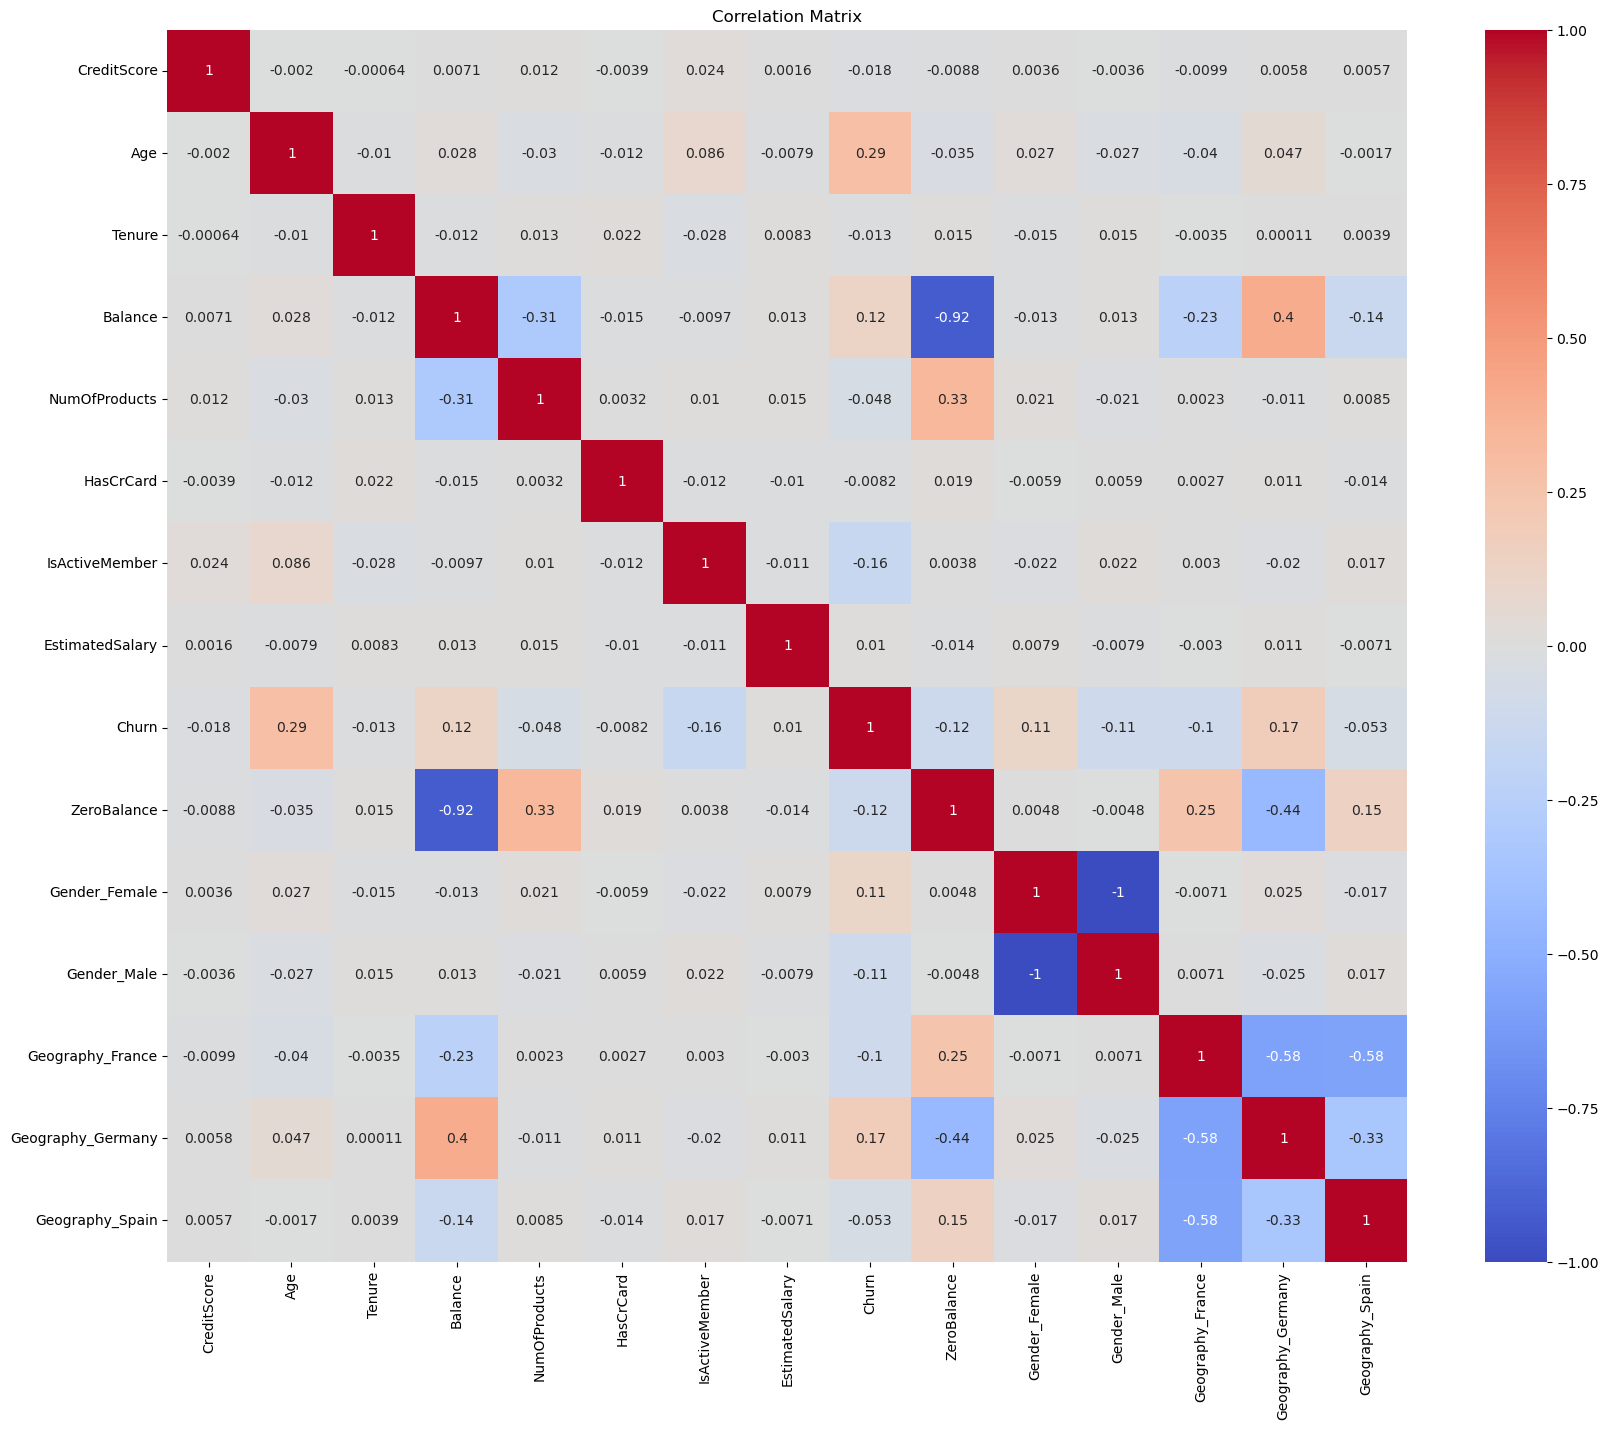

In [224]:
#Correlation Matrix Heatmap
plt.figure(figsize=(20, 16))
sns.heatmap(df.corr(), annot = True, cmap = 'coolwarm')
plt.title('Correlation Matrix')
plt.show()

<Axes: >

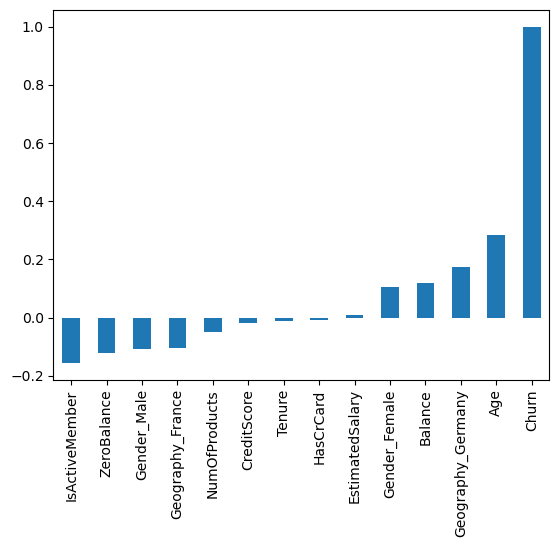

In [225]:
df.corr()['Churn'][:-1].sort_values().plot(kind='bar')

### Findings

1. There are high negative correlation between ZeroBalance and Balance. Balance already provide the information about ZeroBalance. We can remove ZeroBalance to simplify the model

In [226]:
# drop ZeroBalance column
df = df.drop(['ZeroBalance'], axis=1)

# Handling Imbalance Dataset:
Using conventional predictive models such as Decision Trees, Logistic Regression, etc. could not be effective when dealing with an imbalanced dataset, because they might be biased toward predicting the class with the highest number of observations, and considering those with fewer numbers as noise. 

The most commonly used approaches include sampling techniques or harnessing the power of cost-sensitive algorithms. 

## Sampling Techniques 
These techniques aim to balance the distribution of the original by: 

* Cluster-based Oversampling:
* Random undersampling: random elimination of examples from the majority class. 
* SMOTE Oversampling: random replication of examples from the minority class. 

## Cost-Sensitive Algorithms 
These algorithms take into consideration the cost of misclassification. They aim to minimize the total cost generated by the models.

* Cost-sensitive Decision Trees.
* Cost-sensitive Logistic Regression. 
* Cost-sensitive Support Vector Machines.

# APPLYING SMOTE

In [227]:
from imblearn.over_sampling import SMOTE

In [228]:
# Create a df copy for smote
df_smote = df.copy()

In [229]:
# Separate features and target variable
X = df_smote.drop('Churn', axis=1)  # Assuming 'target_column_name' is the name of your target column
y = df_smote['Churn']

In [230]:
# Instantiate SMOTE
smote = SMOTE(sampling_strategy='auto', random_state=42)
# smote = SMOTE(sampling_strategy='minority')

# Apply SMOTE to the data
X_train_SMOTE, y_train_SMOTE = smote.fit_resample(X, y)

# If you want to convert back to DataFrame after resampling
# resampled_df = pd.DataFrame(X_resampled, columns=df.columns[:-1])
# resampled_df['target'] = y_resampled

In [231]:
# Check if the data is balance
y_train_SMOTE.value_counts()

Churn
1    7963
0    7963
Name: count, dtype: int64

In [232]:
X_train_SMOTE

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Gender_Female,Gender_Male,Geography_France,Geography_Germany,Geography_Spain
0,-0.332717,42,2,-1.225662,1,1,1,0.022868,1,0,1,0,0
1,-0.447220,41,1,0.117578,1,0,1,0.217491,1,0,0,0,1
2,-1.550611,42,8,1.333332,3,1,0,0.241640,1,0,1,0,0
3,0.500032,39,1,-1.225662,2,0,0,-0.107912,1,0,1,0,0
4,2.071844,43,2,0.785984,1,1,1,-0.364221,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15921,-0.699448,42,1,0.913895,1,1,0,-0.495327,1,0,0,1,0
15922,-0.035235,42,5,0.609060,3,1,0,0.780504,1,0,0,1,0
15923,0.845662,35,0,0.478254,1,0,0,1.354994,0,1,0,0,0
15924,0.918216,45,7,0.790060,1,0,0,1.031542,0,0,0,1,0


## Train/Test Split

In [233]:
# Split dataset without SMOTE

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop('Churn',axis=1), df['Churn'], test_size=0.3, random_state=42)

In [234]:
X_train

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Gender_Female,Gender_Male,Geography_France,Geography_Germany,Geography_Spain
478,-0.853185,38,7,-1.225662,1,1,1,0.146676,0,1,1,0,0
1332,1.322371,38,3,1.098654,2,1,1,0.463681,0,1,1,0,0
4016,-1.779617,40,6,1.159111,1,0,1,-0.359961,0,1,1,0,0
9643,-1.352834,41,2,-1.225662,2,1,1,0.227001,1,0,1,0,0
1782,-1.009325,35,6,0.660919,2,0,0,-0.082684,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5743,-0.166167,38,0,0.429318,1,0,0,1.013819,0,1,0,0,1
5200,-1.446518,42,9,0.280227,2,1,0,-1.481396,0,1,0,1,0
5399,0.853950,35,8,0.423884,1,1,1,-0.940142,0,1,0,0,1
861,-1.071781,32,2,1.538296,1,1,0,1.530870,1,0,1,0,0


In [235]:
# Split SMOTE dataset

from sklearn.model_selection import train_test_split
X_train_smote, X_test_smote, y_train_smote, y_test_smote = train_test_split(X_train_SMOTE, y_train_SMOTE, test_size=0.3, random_state=42)

In [236]:
X_train_smote

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Gender_Female,Gender_Male,Geography_France,Geography_Germany,Geography_Spain
6428,-0.291079,37,4,1.021608,1,1,1,-0.107807,1,0,1,0,0
9992,-0.706014,39,1,-1.225662,3,0,0,0.151687,0,1,1,0,0
12320,0.080869,47,4,-0.405954,1,1,0,1.008410,0,1,0,0,0
5896,-1.456927,30,5,-1.225662,2,1,0,0.764325,1,0,1,0,0
11840,-1.697180,34,8,0.620765,1,0,1,0.804607,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13418,-0.401937,44,5,-1.225662,2,0,0,-0.543452,1,0,0,0,0
5390,0.853950,35,8,0.423884,1,1,1,-0.940142,0,1,0,0,1
860,-1.071781,32,2,1.538296,1,1,0,1.530870,1,0,1,0,0
15795,-0.725050,29,3,1.114700,1,0,0,0.472204,1,0,1,0,0


## Model Building

Since this is a binary-classification problem, we can try build a ML model using the following architecture:

1. Logistic Regression
2. Support Vector Machine
3. KNN
4. Decision Tree Classifier - Can handle Categorical & Numerical
5. Random Forest Classifier - Can handle Categorical & Numerical
6. XGBoost Classifier


### 1. Logistic Regression

In [237]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

lr = LogisticRegression(max_iter=1000, random_state=42)

In [238]:
# training the model (imbalance)
lr.fit(X_train, y_train)

# Calculating training accuracy
train_accuracy = lr.score(X_train, y_train)
print("Training Accuracy:", train_accuracy)

# Calculate test accuracy
lr_pred = lr.predict(X_test)
print("Test Accuracy:", accuracy_score(y_test, lr_pred))

# test_accuracy = lr.score(X_test, y_test)
# print("Test Accuracy:", test_accuracy)

Training Accuracy: 0.8147088281585348
Test Accuracy: 0.804739652870494


In [239]:
# training the model (SMOTE)
lr.fit(X_train_smote, y_train_smote)

# Calculating training accuracy
train_accuracy = lr.score(X_train_smote, y_train_smote)
print("Training Accuracy:", train_accuracy)

# Calculate test accuracy
lr_pred_smote = lr.predict(X_test_smote)
print("Test Accuracy:", accuracy_score(y_test_smote, lr_pred_smote))

Training Accuracy: 0.8075888051668461
Test Accuracy: 0.795311845960653


### 2. Support Vector Machine (SVM)

In [240]:
from sklearn.svm import SVC
svm = SVC()
svm

SVC()

In [241]:
svm.fit(X_train, y_train)

# Calculating training accuracy
train_accuracy = svm.score(X_train, y_train)
print("Training Accuracy:", train_accuracy)

# Calculate test accuracy
svm_pred = svm.predict(X_test)
print("Test Accuracy:", accuracy_score(y_test, svm_pred))

Training Accuracy: 0.80168836743454
Test Accuracy: 0.787716955941255


In [242]:
svm.fit(X_train_smote, y_train_smote)

# Calculating training accuracy
train_accuracy = svm.score(X_train_smote, y_train_smote)
print("Training Accuracy:", train_accuracy)

# Calculate test accuracy
svm_pred_smote = svm.predict(X_test_smote)
print("Test Accuracy:", accuracy_score(y_test_smote, svm_pred_smote))

Training Accuracy: 0.7610333692142088
Test Accuracy: 0.7463373796567602


### 3. K-Nearest Neighbors (KNN)

In [243]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn

KNeighborsClassifier()

In [244]:
knn.fit(X_train, y_train)

# Calculating training accuracy
train_accuracy = knn.score(X_train, y_train)
print("Training Accuracy:", train_accuracy)

# Calculate test accuracy
knn_pred = knn.predict(X_test)
print("Test Accuracy:", accuracy_score(y_test, knn_pred))

Training Accuracy: 0.8639290313349549
Test Accuracy: 0.8064085447263017


In [245]:
knn.fit(X_train_smote, y_train_smote)

# Calculating training accuracy
train_accuracy = knn.score(X_train_smote, y_train_smote)
print("Training Accuracy:", train_accuracy)

# Calculate test accuracy
knn_pred_smote = knn.predict(X_test_smote)
print("Test Accuracy:", accuracy_score(y_test_smote, knn_pred_smote))

Training Accuracy: 0.8989056332974524
Test Accuracy: 0.8357053160318125


### 4. Decision Tree Classifier

Using GridSearchCV to find the best parameters for the model.

In [246]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

In [247]:
# #creating Decision Tree Classifer object
# dtree = DecisionTreeClassifier()

# #defining parameter range
# param_grid = {
#     'max_depth': [2,4,6,8,10,12,14,16,18,20],
#     'min_samples_leaf': [1,2,3,4,5,6,7,8,9,10],
#     'criterion': ['gini', 'entropy'],
#     'random_state': [0,42]
#     }

# #Creating grid search object
# grid_dtree = GridSearchCV(dtree, param_grid, cv = 5, scoring = 'roc_auc', n_jobs = -1, verbose = 2)

# #Fitting the grid search object to the training data
## grid_dtree.fit(X_train, y_train)
# grid_dtree.fit(X_train_smote, y_train_smote)

# #Printing the best parameters
# print('Best parameters found: ', grid_dtree.best_params_)


* Best parameters found for IMBALANCE: {'criterion': 'gini', 'max_depth': 6, 'min_samples_leaf': 8, 'random_state': 0}
* Best parameters found for SMOTE:  {'criterion': 'entropy', 'max_depth': 8, 'min_samples_leaf': 9, 'random_state': 42}

Add the best parameters to the model

In [248]:
dtree = DecisionTreeClassifier(criterion='gini', max_depth=6, random_state=0, min_samples_leaf=8)
dtree

DecisionTreeClassifier(max_depth=6, min_samples_leaf=8, random_state=0)

In [249]:
dtree_smote = DecisionTreeClassifier(criterion='entropy', max_depth=8, random_state=42, min_samples_leaf=9)
dtree_smote

DecisionTreeClassifier(criterion='entropy', max_depth=8, min_samples_leaf=9,
                       random_state=42)

In [250]:
#training the model
dtree.fit(X_train, y_train)

# Calculating training accuracy
train_accuracy = dtree.score(X_train, y_train)
print("Training Accuracy:", train_accuracy)

# Calculate test accuracy
dtree_pred = dtree.predict(X_test)
print("Test Accuracy:", accuracy_score(y_test, dtree_pred))

Training Accuracy: 0.8662183431106024
Test Accuracy: 0.8544726301735648


In [251]:
#training the model
dtree_smote.fit(X_train_smote, y_train_smote)

# Calculating training accuracy
train_accuracy = dtree_smote.score(X_train_smote, y_train_smote)
print("Training Accuracy:", train_accuracy)

# Calculate test accuracy
dtree_pred_smote = dtree_smote.predict(X_test_smote)
print("Test Accuracy:", accuracy_score(y_test_smote, dtree_pred_smote))

Training Accuracy: 0.8555794761392178
Test Accuracy: 0.8390539974884889


### 5. Random Forest Classifier

Using GridSearchCV to find the best parameters for the model.

In [252]:
from sklearn.ensemble import RandomForestClassifier

In [253]:
# from sklearn.ensemble import RandomForestClassifier
# #creating Random Forest Classifer object
# rfc = RandomForestClassifier()

# #defining parameter range
# param_grid = {
#     'max_depth': [2,4,6,8,10],
#     'min_samples_leaf': [2,4,6,8,10],
#     'criterion': ['gini', 'entropy'],
#     'random_state': [0,42]
#     }

# #Creating grid search object
# grid_rfc = GridSearchCV(rfc, param_grid, cv = 5, scoring = 'roc_auc', n_jobs = -1, verbose = 2)

# #Fitting the grid search object to the training data
# # grid_rfc.fit(X_train, y_train)
# grid_rfc.fit(X_train_smote, y_train_smote)

# #Printing the best parameters
# print('Best parameters found: ', grid_rfc.best_params_)

* Best parameters found without SMOTE:  {'criterion': 'entropy', 'max_depth': 8, 'min_samples_leaf': 8, 'random_state': 0}
* Best parameters found with SMOTE:  {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 2, 'random_state': 0}

Add the best parameters to the model

In [254]:
rfc = RandomForestClassifier(criterion='entropy', max_depth=8, min_samples_leaf=8, random_state=0)
rfc

RandomForestClassifier(criterion='entropy', max_depth=8, min_samples_leaf=8,
                       random_state=0)

In [255]:
rfc_smote = RandomForestClassifier(criterion='entropy', max_depth=10, min_samples_leaf=2, random_state=0)
rfc_smote

RandomForestClassifier(criterion='entropy', max_depth=10, min_samples_leaf=2,
                       random_state=0)

In [256]:
#training the model
rfc.fit(X_train, y_train)

# Calculating training accuracy
train_accuracy = rfc.score(X_train, y_train)
print("Training Accuracy:", train_accuracy)

# Calculate test accuracy
rfc_pred = rfc.predict(X_test)
print("Test Accuracy:", accuracy_score(y_test, rfc_pred))

Training Accuracy: 0.8753755902131921
Test Accuracy: 0.8541388518024032


In [257]:
#training the model
rfc_smote.fit(X_train_smote, y_train_smote)

# Calculating training accuracy
train_accuracy = rfc_smote.score(X_train_smote, y_train_smote)
print("Training Accuracy:", train_accuracy)

# Calculate test accuracy
rfc_pred_smote = rfc_smote.predict(X_test_smote)
print("Test Accuracy:", accuracy_score(y_test_smote, rfc_pred_smote))

Training Accuracy: 0.8998923573735199
Test Accuracy: 0.8658434491419004


### 6. XGBoost

In [258]:
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.metrics import make_scorer, accuracy_score

In [259]:
# from sklearn.model_selection import GridSearchCV
# from sklearn.metrics import make_scorer, accuracy_score

# xgb = XGBClassifier()
# param_grid = {
#     'learning_rate': [0.01, 0.1, 0.2],
#     'n_estimators': [100, 200, 300],
#     'max_depth': [3, 4, 5],
#     'subsample': [0.8, 0.9, 1.0],
#     'colsample_bytree': [0.8, 0.9, 1.0],
#     'objective': ['binary:logistic'],
#     'eval_metric': ['logloss'],
# }

# # Perform a grid search with cross-validation to find the best hyperparameters
# grid_search = GridSearchCV(
#     estimator=xgb,
#     param_grid=param_grid,
#     scoring=make_scorer(accuracy_score),
#     cv=5,  # Number of cross-validation folds
#     verbose=2,  # Increase verbosity to see progress
# )

# # grid_search.fit(X_train, y_train)
# grid_search.fit(X_train_smote, y_train_smote)

# # Print the best hyperparameters
# print('Best parameters found: ', grid_search.best_params_)

* Best parameters found without SMOTE:  {'colsample_bytree': 1.0, 'eval_metric': 'logloss', 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200, 'objective': 'binary:logistic', 'subsample': 0.8}
* Best parameters found with SMOTE:  {'colsample_bytree': 0.9, 'eval_metric': 'logloss', 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 300, 'objective': 'binary:logistic', 'subsample': 0.9}

In [260]:
xgb = XGBClassifier(
    learning_rate=0.1,
    n_estimators=200,
    max_depth=3,
    subsample=0.8,
    colsample_bytree=1.0,
    objective='binary:logistic',
    eval_metric = 'logloss',
    random_state=42
)

In [261]:
xgb_smote = XGBClassifier(
    learning_rate=0.1,
    n_estimators=300,
    max_depth=5,
    subsample=0.9,
    colsample_bytree=0.9,
    objective='binary:logistic',
    eval_metric = 'logloss',
    random_state=42
)

In [262]:
#Fitting the Xgboost to the training data
xgb.fit(X_train, y_train)

# Calculating training accuracy
train_accuracy = xgb.score(X_train, y_train)
print("Training Accuracy:", train_accuracy)

#test accuracy
xgb_pred = xgb.predict(X_test)
print("Test Accuracy:", accuracy_score(y_test, xgb_pred))

Training Accuracy: 0.8856774932036057
Test Accuracy: 0.8531375166889186


In [263]:
#Fitting the Xgboost to the training data
xgb_smote.fit(X_train_smote, y_train_smote)

# Calculating training accuracy
train_accuracy = xgb_smote.score(X_train_smote, y_train_smote)
print("Training Accuracy:", train_accuracy)

# Calculate test accuracy
xgb_pred_smote = xgb_smote.predict(X_test_smote)
print("Test Accuracy:", accuracy_score(y_test_smote, xgb_pred_smote))

Training Accuracy: 0.9327233584499461
Test Accuracy: 0.8737965676015069


# FINDINGS:
1. We try to train the model for dataset with and without SMOTE, to find if the model perform well with the additional synstetic data.
2. Discovered that XGBoost, Random Forest Classifier and KNN perform well with SMOTE dataset.
3. Decision Tree Classifier, SVM, Logistic Regression perform well without SMOTE dataset.
4. However, XGBoost give the highest model test accuracy on SMOTE dataset.

For the model evaluation, we will only validate for model using SMOTE dataset

# Model Evaluation

In [264]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, mean_absolute_error, log_loss, f1_score, mean_squared_error, precision_score, recall_score, r2_score

## Confusion Matrix

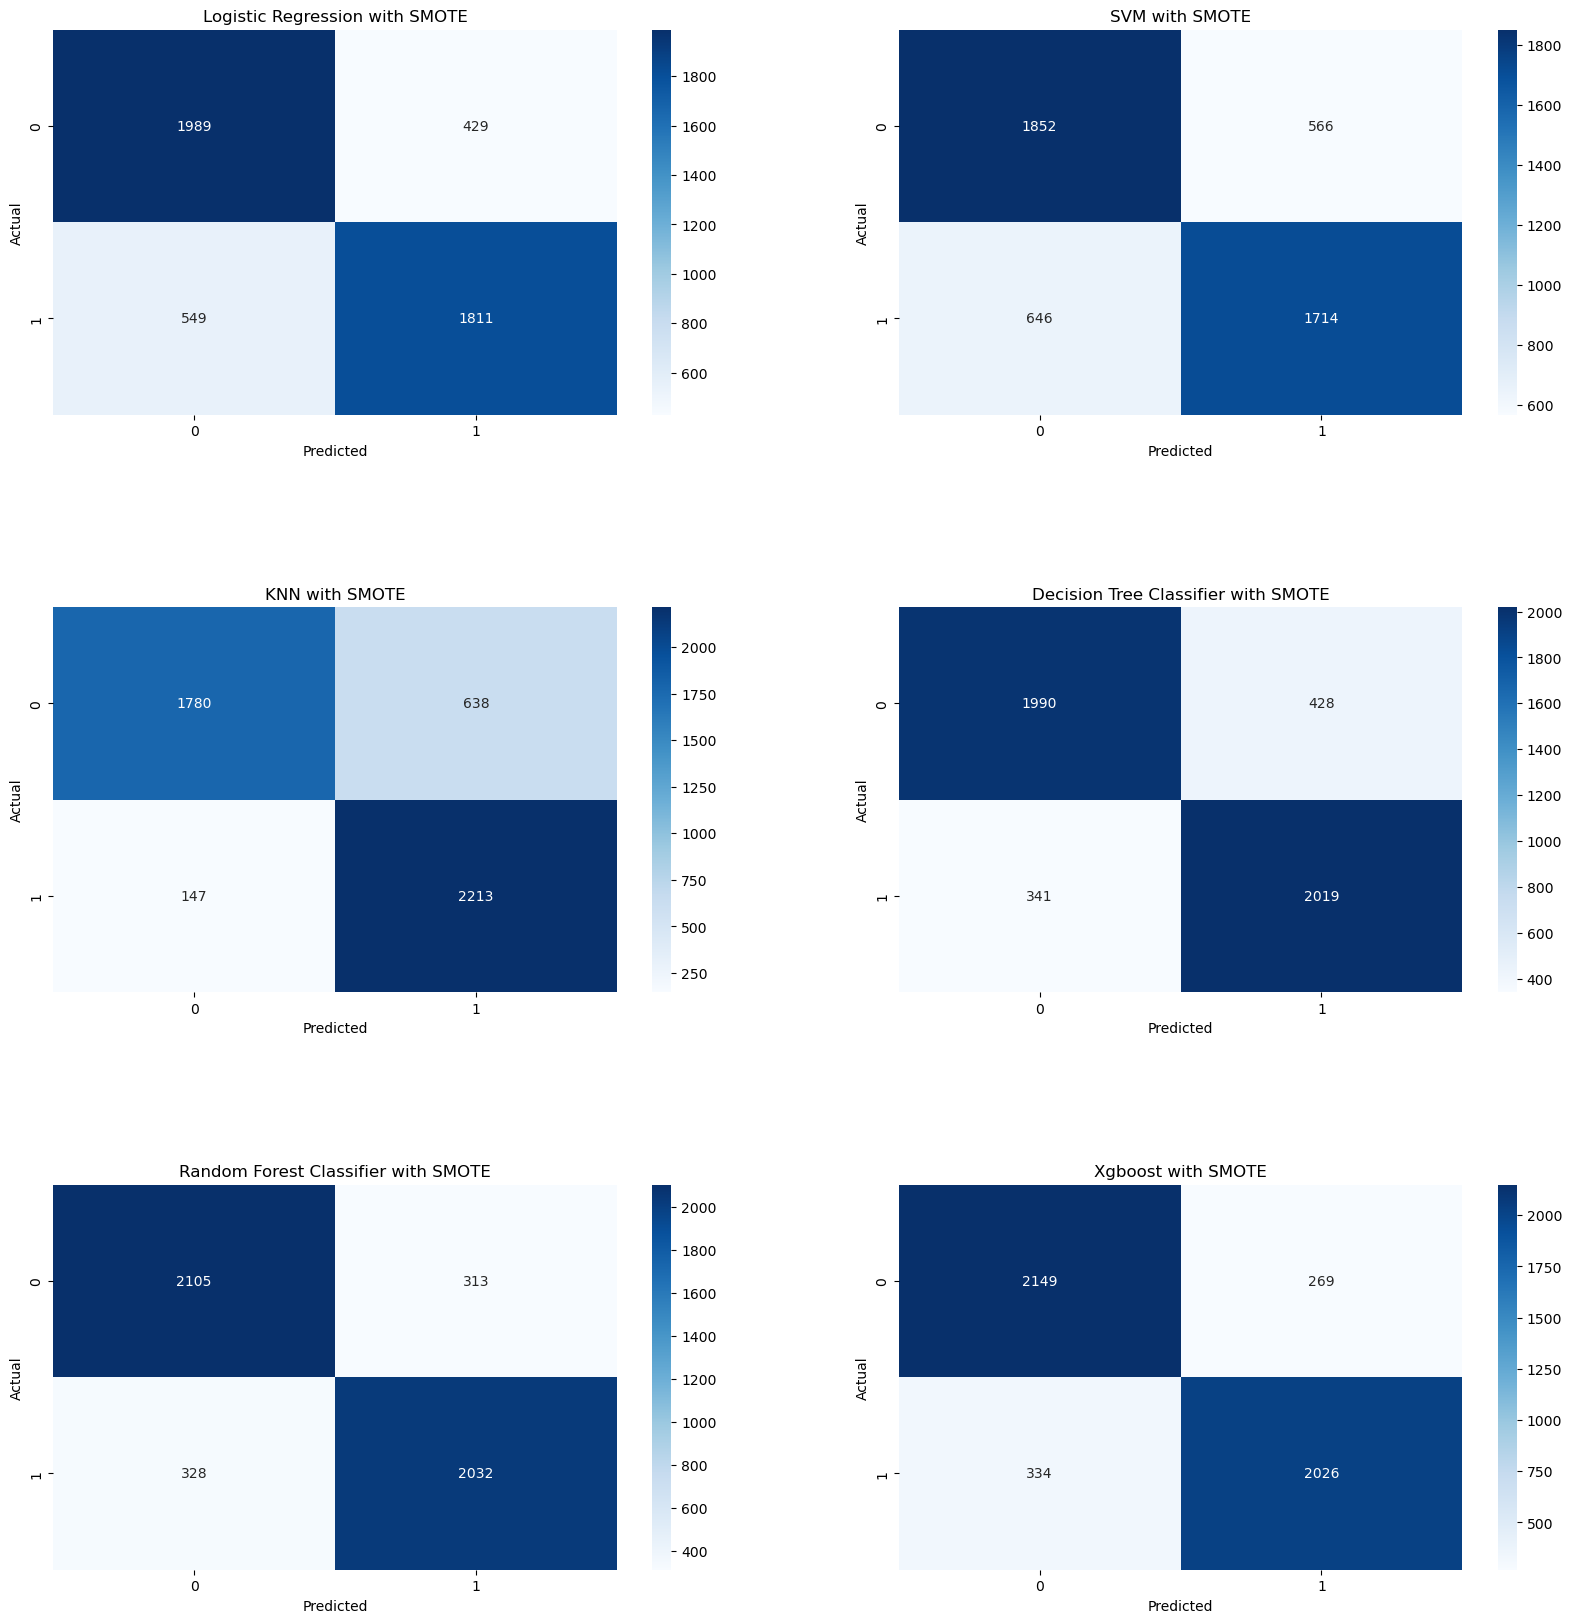

In [265]:
fig, ax = plt.subplots(3,2,figsize=(20,20))
fig.subplots_adjust(hspace=0.5)

sns.heatmap(confusion_matrix(y_test_smote, lr_pred_smote), annot=True, cmap='Blues', fmt='g', ax=ax[0,0]).set(title='Logistic Regression with SMOTE')
sns.heatmap(confusion_matrix(y_test_smote, svm_pred_smote), annot=True, cmap='Blues', fmt='g', ax=ax[0,1]).set(title='SVM with SMOTE')
sns.heatmap(confusion_matrix(y_test_smote, knn_pred_smote), annot=True, cmap='Blues', fmt='g', ax=ax[1,0]).set(title='KNN with SMOTE')
sns.heatmap(confusion_matrix(y_test_smote, dtree_pred_smote), annot=True, cmap='Blues', fmt='g', ax=ax[1,1]).set(title='Decision Tree Classifier with SMOTE')
sns.heatmap(confusion_matrix(y_test_smote, rfc_pred_smote), annot=True, cmap='Blues', fmt='g', ax=ax[2,0]).set(title='Random Forest Classifier with SMOTE')
sns.heatmap(confusion_matrix(y_test_smote, xgb_pred_smote), annot=True, cmap='Blues', fmt='g', ax=ax[2,1]).set(title='Xgboost with SMOTE')

# Set X-axis and Y-axis labels
ax[0, 0].set_xlabel('Predicted')
ax[0, 0].set_ylabel('Actual')

ax[0, 1].set_xlabel('Predicted')
ax[0, 1].set_ylabel('Actual')

ax[1, 0].set_xlabel('Predicted')
ax[1, 0].set_ylabel('Actual')

ax[1, 1].set_xlabel('Predicted')
ax[1, 1].set_ylabel('Actual')

ax[2, 0].set_xlabel('Predicted')
ax[2, 0].set_ylabel('Actual')

ax[2, 1].set_xlabel('Predicted')
ax[2, 1].set_ylabel('Actual')

plt.show()

## Classification Report

In [266]:
print("lr_smote",classification_report(y_test_smote,lr_pred_smote))
print("svm_smote", classification_report(y_test_smote,svm_pred_smote))
print("knn_smote", classification_report(y_test_smote,knn_pred_smote))
print("dtree_smote", classification_report(y_test_smote,dtree_pred_smote))
print("rfc_smote", classification_report(y_test_smote,rfc_pred_smote))
print("xgb_smote", classification_report(y_test_smote,xgb_pred_smote))

lr_smote               precision    recall  f1-score   support

           0       0.78      0.82      0.80      2418
           1       0.81      0.77      0.79      2360

    accuracy                           0.80      4778
   macro avg       0.80      0.79      0.80      4778
weighted avg       0.80      0.80      0.80      4778

svm_smote               precision    recall  f1-score   support

           0       0.74      0.77      0.75      2418
           1       0.75      0.73      0.74      2360

    accuracy                           0.75      4778
   macro avg       0.75      0.75      0.75      4778
weighted avg       0.75      0.75      0.75      4778

knn_smote               precision    recall  f1-score   support

           0       0.92      0.74      0.82      2418
           1       0.78      0.94      0.85      2360

    accuracy                           0.84      4778
   macro avg       0.85      0.84      0.83      4778
weighted avg       0.85      0.84      0.83  

In [267]:
print('==================== Logistic Regression =========================')
print('Accuracy Score: ', accuracy_score(y_test_smote,lr_pred_smote))
print('Recall Score: ', recall_score(y_test_smote,lr_pred_smote))
print('Precision Score: ', precision_score(y_test_smote,lr_pred_smote))
print('f1 Score: ', f1_score(y_test_smote,lr_pred_smote))
print('R2 Score: ', r2_score(y_test_smote,lr_pred_smote))
print('Mean Squared Error: ', mean_squared_error(y_test_smote,lr_pred_smote))

print('==================== SVM =========================')
print('Accuracy Score: ', accuracy_score(y_test_smote,svm_pred_smote))
print('Recall Score: ', recall_score(y_test_smote,svm_pred_smote))
print('Precision Score: ', precision_score(y_test_smote,svm_pred_smote))
print('f1 Score: ', f1_score(y_test_smote,svm_pred_smote))
print('R2 Score: ', r2_score(y_test_smote,svm_pred_smote))
print('Mean Squared Error: ', mean_squared_error(y_test_smote,svm_pred_smote))

print('==================== KNN =========================')
print('Accuracy Score: ', accuracy_score(y_test_smote,knn_pred_smote))
print('Recall Score: ', recall_score(y_test_smote,knn_pred_smote))
print('Precision Score: ', precision_score(y_test_smote,knn_pred_smote))
print('f1 Score: ', f1_score(y_test_smote,knn_pred_smote))
print('R2 Score: ', r2_score(y_test_smote,knn_pred_smote))
print('Mean Squared Error: ', mean_squared_error(y_test_smote,knn_pred_smote))

print('==================== Decision Tree Classifier ====================')
print('Accuracy Score: ', accuracy_score(y_test_smote,dtree_pred_smote))
print('Recall Score: ', recall_score(y_test_smote,dtree_pred_smote))
print('Precision Score: ', precision_score(y_test_smote,dtree_pred_smote))
print('f1 Score: ', f1_score(y_test_smote,dtree_pred_smote))
print('R2 Score: ', r2_score(y_test_smote,dtree_pred_smote))
print('Mean Squared Error: ', mean_squared_error(y_test_smote,dtree_pred_smote))

print('==================== Random Forest Classifier ====================')
print('Accuracy Score: ', accuracy_score(y_test_smote,rfc_pred_smote))
print('Recall Score: ', recall_score(y_test_smote,rfc_pred_smote))
print('Precision Score: ', precision_score(y_test_smote,rfc_pred_smote))
print('f1 Score: ', f1_score(y_test_smote,rfc_pred_smote))
print('R2 Score: ', r2_score(y_test_smote,rfc_pred_smote))
print('Mean Squared Error: ', mean_squared_error(y_test_smote,rfc_pred_smote))

print('==================== Xgboost =========================')
print('Accuracy Score: ', accuracy_score(y_test_smote,xgb_pred_smote))
print('Recall Score: ', recall_score(y_test_smote,xgb_pred_smote))
print('Precision Score: ', precision_score(y_test_smote,xgb_pred_smote))
print('f1 Score: ', f1_score(y_test_smote,xgb_pred_smote))
print('R2 Score: ', r2_score(y_test_smote,xgb_pred_smote))
print('Mean Squared Error: ', mean_squared_error(y_test_smote,xgb_pred_smote))

==================== Logistic Regression =========================
Accuracy Score:  0.795311845960653
Recall Score:  0.7673728813559322
Precision Score:  0.8084821428571428
f1 Score:  0.787391304347826
R2 Score:  0.18112671909828837
Mean Squared Error:  0.204688154039347
==================== SVM =========================
Accuracy Score:  0.7463373796567602
Recall Score:  0.726271186440678
Precision Score:  0.7517543859649123
f1 Score:  0.7387931034482759
R2 Score:  -0.014800016822980044
Mean Squared Error:  0.25366262034323983
==================== KNN =========================
Accuracy Score:  0.8357053160318125
Recall Score:  0.9377118644067797
Precision Score:  0.7762188705717292
f1 Score:  0.8493571291498753
R2 Score:  0.34272441154617217
Mean Squared Error:  0.16429468396818753
==================== Decision Tree Classifier ====================
Accuracy Score:  0.8390539974884889
Recall Score:  0.8555084745762712
Precision Score:  0.825091949325705
f1 Score:  0.8400249635947576
R2 S

### Precision-Recall Curves

In [ ]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, r2_score, mean_squared_error
from sklearn.metrics import precision_recall_curve

classifiers = [lr, svm, knn, dtree_smote, rfc_smote, xgb_smote]
classifier_names = ['Logistic Regression', 'SVM', 'KNN', 'Decision Tree', 'Random Forest', 'XGBoost']
y_preds = [lr_pred_smote, svm_pred_smote, knn_pred_smote, dtree_pred_smote, rfc_pred_smote, xgb_pred_smote]  # Predicted probabilities for positive class

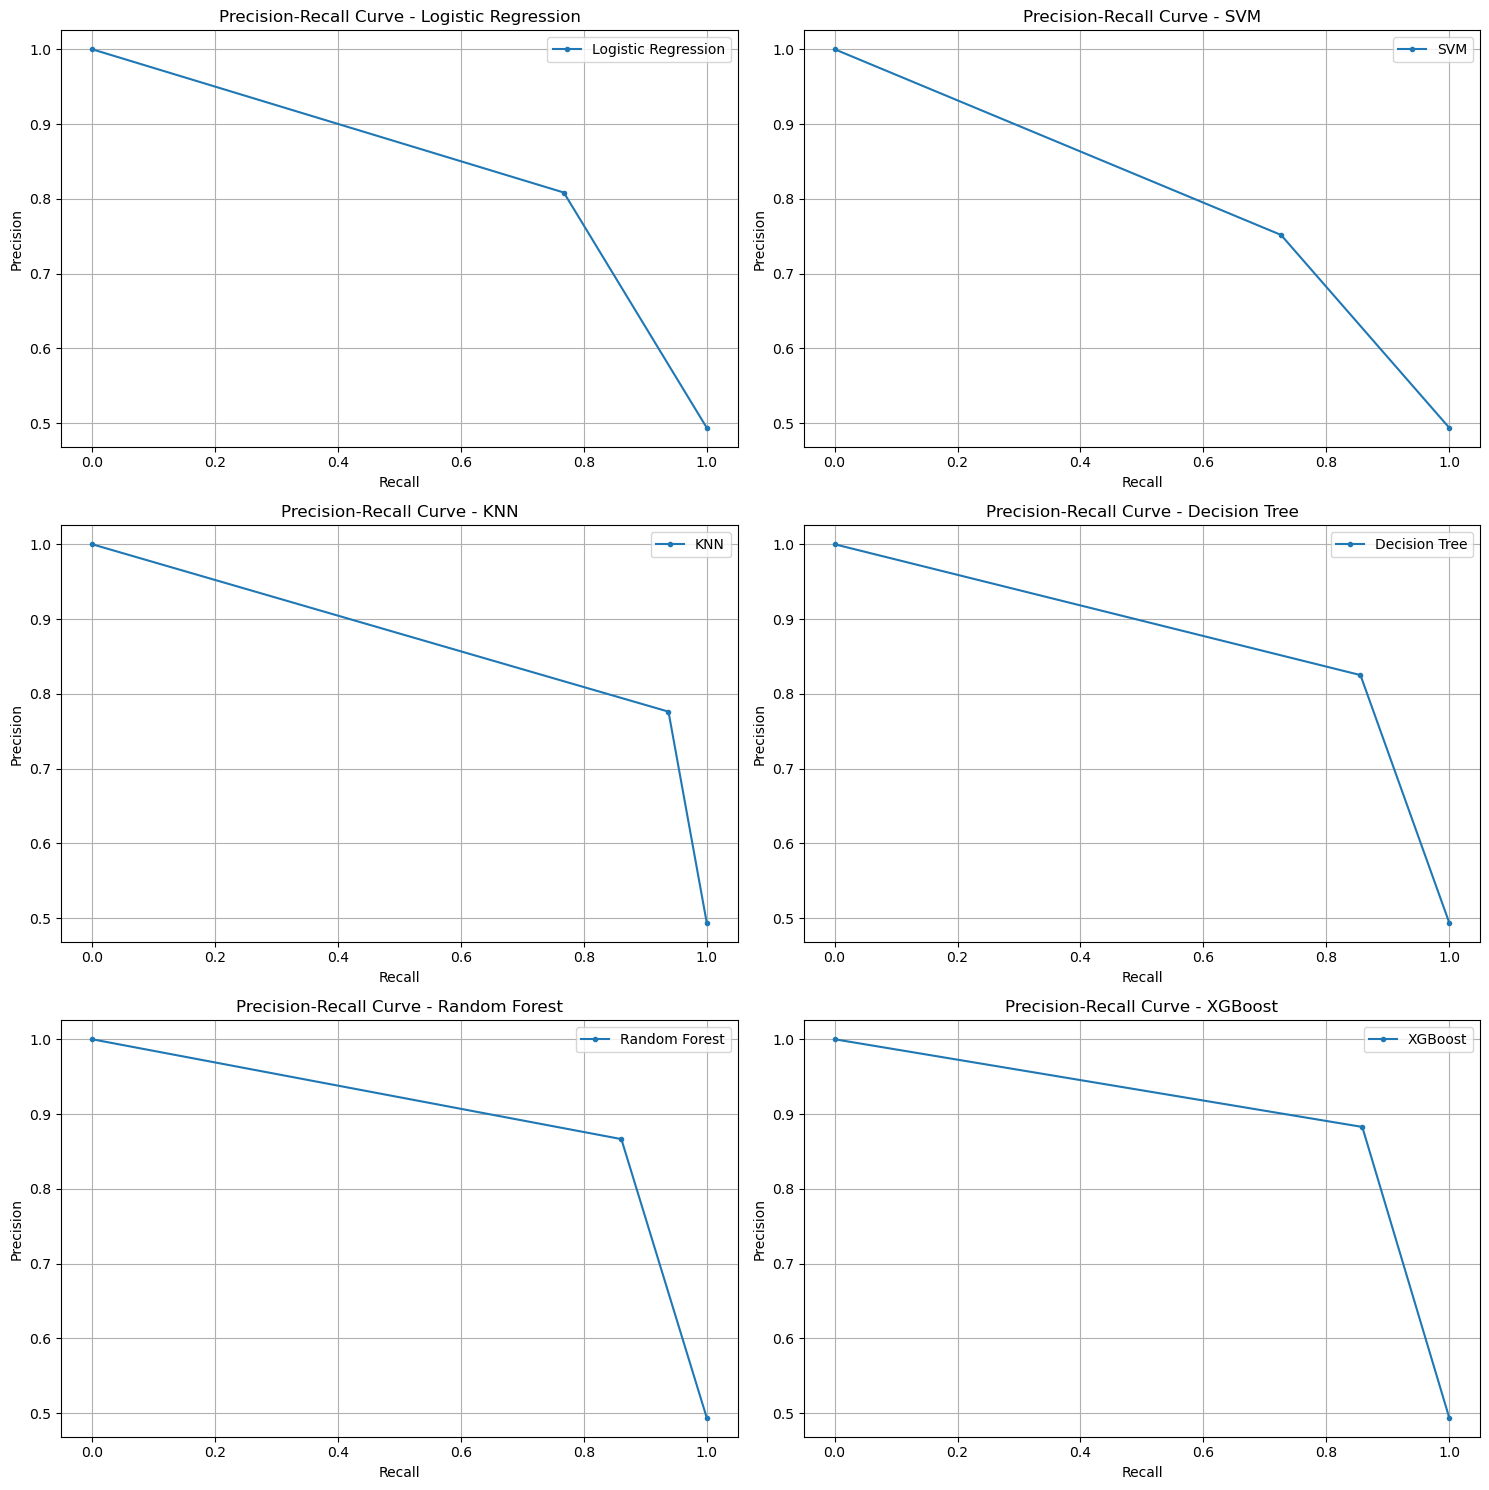

In [280]:
from sklearn.metrics import precision_recall_curve

classifiers = [lr, svm, knn, dtree_smote, rfc_smote, xgb_smote]
classifier_names = ['Logistic Regression', 'SVM', 'KNN', 'Decision Tree', 'Random Forest', 'XGBoost']
y_preds = [lr_pred_smote, svm_pred_smote, knn_pred_smote, dtree_pred_smote, rfc_pred_smote, xgb_pred_smote]  # Predicted probabilities for positive class

# Calculate the number of rows and columns needed for the subplots
num_classifiers = len(classifiers)
num_rows = (num_classifiers + 1) // 2  # Ceiling division to ensure at least one row
num_cols = min(num_classifiers, 2)

# Create subplots
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, 5 * num_rows))
fig.subplots_adjust(hspace=0.5)

# Flatten axes if needed for easier indexing
axes = axes.flatten()

# Plot precision-recall curves for each classifier
for i, (classifier, classifier_name, y_pred) in enumerate(zip(classifiers, classifier_names, y_preds)):
    # Calculate precision and recall
    precision, recall, _ = precision_recall_curve(y_test_smote, y_pred)
    
    # Plot precision-recall curve on the i-th subplot
    ax = axes[i]
    ax.plot(recall, precision, marker='.', label=classifier_name)
    ax.set_xlabel('Recall')
    ax.set_ylabel('Precision')
    ax.set_title(f'Precision-Recall Curve - {classifier_name}')
    ax.grid(True)
    ax.legend()

# Hide any unused subplots
for i in range(num_classifiers, num_rows * num_cols):
    axes[i].axis('off')

# Adjust layout
plt.tight_layout()
plt.show()

### Specificity

In [283]:
# Calculate specificity for each model
for classifier, classifier_name, y_pred in zip(classifiers, classifier_names, y_preds):
    tn, fp, fn, tp = confusion_matrix(y_test_smote, y_pred).ravel()
    specificity = tn / (tn + fp)
    print(f'Specificity for {classifier_name}: {specificity}')

Specificity for Logistic Regression: 0.8225806451612904
Specificity for SVM: 0.7659222497932175
Specificity for KNN: 0.7361455748552522
Specificity for Decision Tree: 0.8229942100909843
Specificity for Random Forest: 0.87055417700579
Specificity for XGBoost: 0.8887510339123242


## Feature Importance

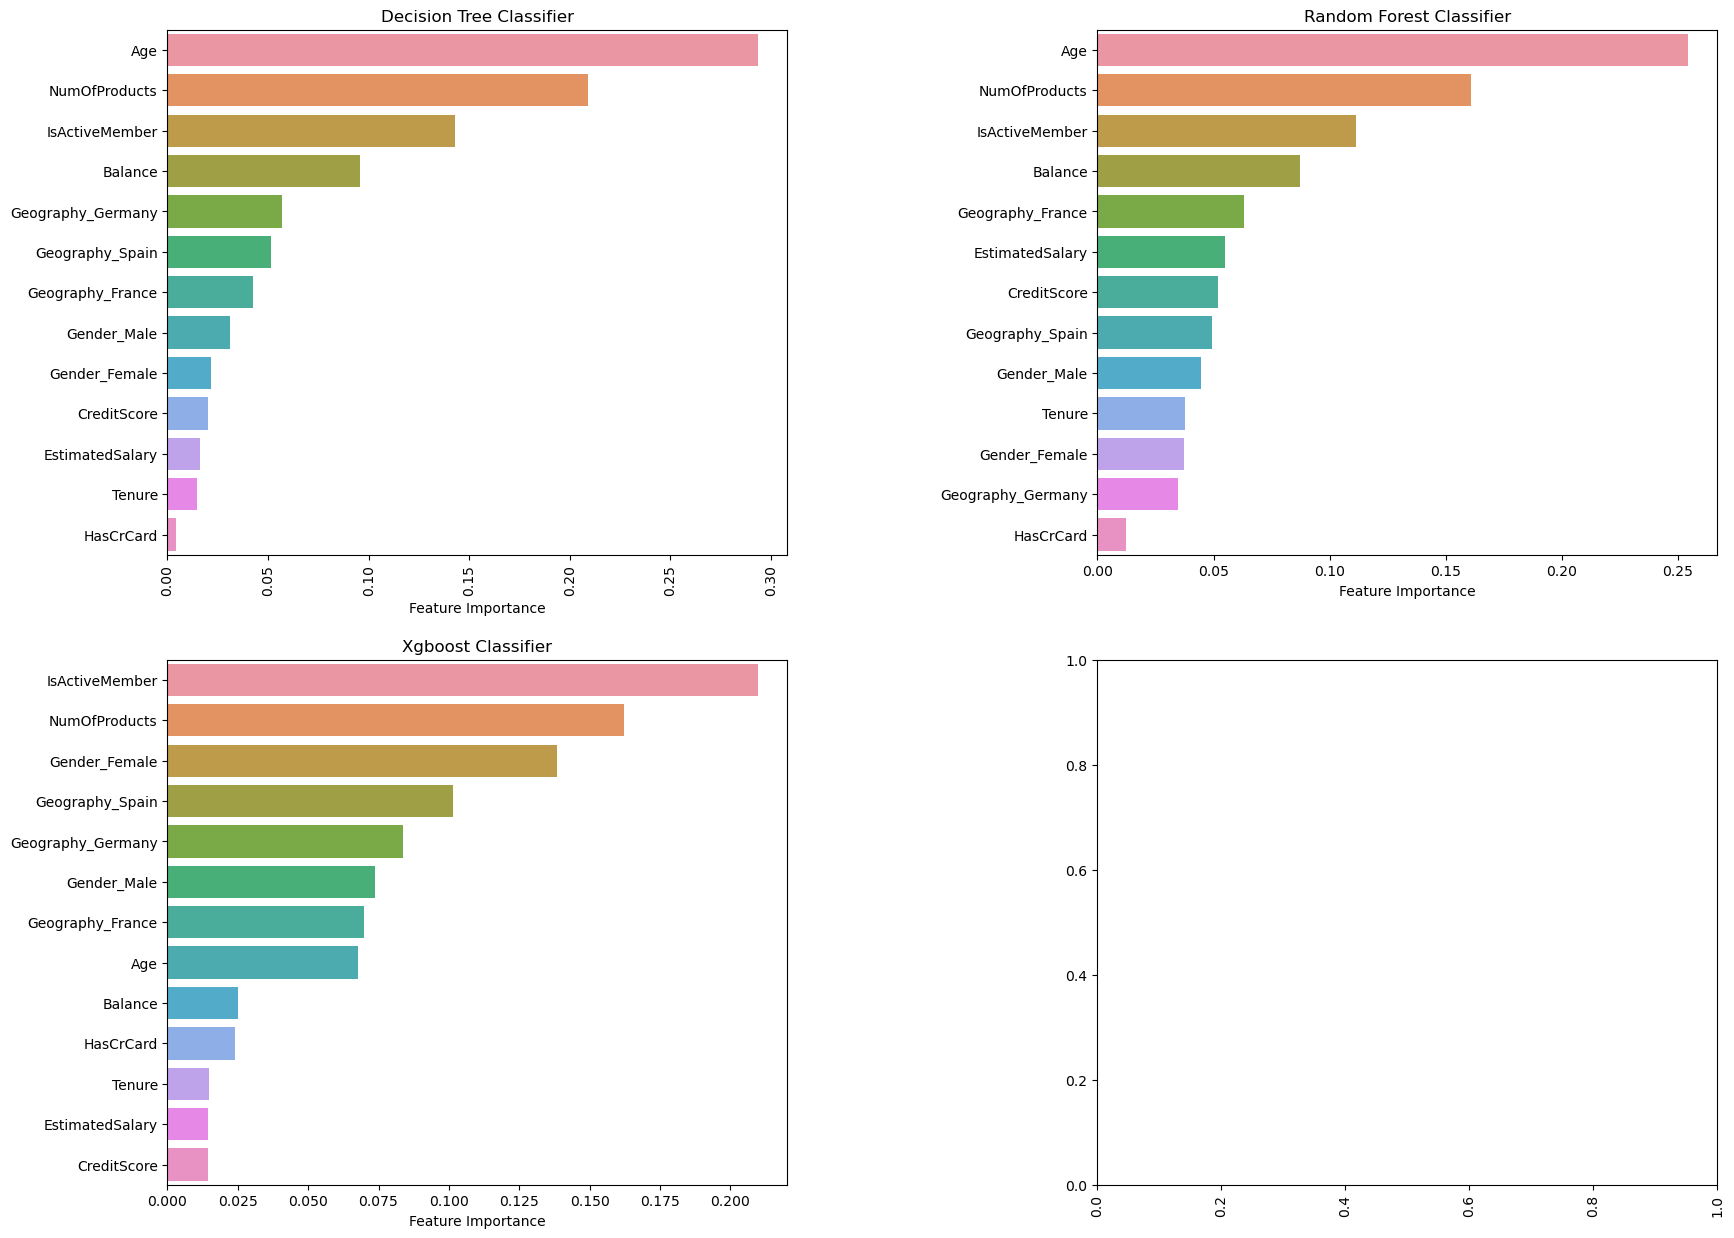

In [268]:
#feature importance for Decision Tree Classifier
feature_importance_dtree = pd.DataFrame(dtree_smote.feature_importances_, index=X_train_smote.columns, columns=['Feature Importance']).sort_values('Feature Importance', ascending=False)

#feature importance for Random Forest Classifier
feature_importance_rfc = pd.DataFrame(rfc_smote.feature_importances_, index=X_train_smote.columns, columns=['Feature Importance']).sort_values('Feature Importance', ascending=False)

#feature importance for Xgboost Classifier
feature_importance_xgb = pd.DataFrame(xgb_smote.feature_importances_, index=X_train_smote.columns, columns=['Feature Importance']).sort_values('Feature Importance', ascending=False)

fig, ax = plt.subplots(2,2,figsize=(20,15))
#space between subplots
fig.subplots_adjust(wspace=0.5)
sns.barplot(y=feature_importance_dtree.index, x=feature_importance_dtree['Feature Importance'], ax=ax[0,0]).set_title('Decision Tree Classifier')
ax[0,0].xaxis.set_tick_params(rotation=90)
sns.barplot(y=feature_importance_rfc.index, x=feature_importance_rfc['Feature Importance'], ax=ax[0,1]).set_title('Random Forest Classifier')
ax[1,1].xaxis.set_tick_params(rotation=90)
sns.barplot(y=feature_importance_xgb.index, x=feature_importance_xgb['Feature Importance'], ax=ax[1,0]).set_title('Xgboost Classifier')
ax[1,1].xaxis.set_tick_params(rotation=90)

## Findings

1. Interestingly, for decision tree and random forest, the model taking into features of Age, NumofProducts, isActiveMember as the top features important for customer churn.
2. However, for XGBoost model, it doest not take Age as top features importance. It takes isActiveMember, NumofProducts, Gender and Geography as top features important for customer churn.

## Conclusion

### Data Exploration
From the exploratory data analysis, I have concluded that the churn count of the customersvdepends upon the following factors:
1. Age
2. Gender
3. CreditScore
4. Geography
5. Balance
6. Number of Products
7. Is Active Member

### Imbalance Dataset
I have use Synthetic Minority Oversampling Technique (SMOTE) to balance the dataset. 

### Model Training
Coming to the classification models, I have used the following classification models:
1. Logistic Regression
2. Support Vector Machine (SVM)
3. KNN
4. Decision Tree Classifier
5. Random Forest Classifier
6. XGBoost

For Decision Tree Classifier, Random Forest Classifier and  XGBoost, I used GridSearchCV to identify best hyperparameters values.

### Model Evaluation
* Since this project handling imbalance data set, the most important evaluation metrix that we need to see is recall, precision and f1-score.
* For churn cases, we want to make sure that the model will predict less False Positive (Actual not churn, predicted churn). We don't want the model to predict churn, while actually it's not churn. This will have high cost to the bank.
* False Positive will have higher cost than False Negative in this case.
* We can also look into evaluation metrix specificity (how well the model to predict no real event) = TN/(TN+FP)
* Based on the precision-recall curves, we can see that model using XGBoost and Random Forest Classifier gives the best plot.




### GENERAL EVALUATION METRIC CHOICE
A. CHOOSE ACCURACY
* The dataset is balance
* The cost of FP and FN are roughly equal
* The benefit of TP and TN are roughly equal

B. CHOOSE PRECISION
* The cost of FP is much higher than a FN
* The benefit of TP is much higher than a TN

C. CHOOSE RECALL
* The cost of FN is much higher than a FP
* The benefit of TN is much higher than a TP

D. CHOOSE ROC AUC & PRECISION - RECALL CURVES
* Use ROC when dealing with balance dataset
* Use precision-recall when dealing with imbalance dataset